# Taller 1 DYD

Integrante: Danelys Brito González

# Introducción al Aprendizaje Automático: Taller 1

El objetivo de este taller consiste en familiarizarse con conceptos básicos del aprendizaje automático y con herramientas que le permitan implementar modelos competitivos correctamente.


<table align='left'>
<tr>
<td><img src='https://upload.wikimedia.org/wikipedia/commons/f/f6/Balen_Minerva_among_the_Muses_%28detail%29.jpg' width='800'/> </td>
</tr>
</table>


# Problema

La música (del griego: mousikē téchnē, "el arte de las musas") es una de las tradiciones más antiguas y universales de la cultura humana. Desde los orígenes de la especie hasta nuestros días, la música se ha desarrollado en un sin número de géneros y estilos que, gracias la tecnología, están a sólo un click de distancia.

En este notebook construiremos clasificadores para predecir el *género* de una canción usando datos obtenidos desde la conocida aplicación *Spotify*.

## Datos

Utilizaremos un dataset denominado *Spotify Tracks DB*
proveniente [*kaggle.com*](https://www.kaggle.com/), plataforma en línea para competencias de ciencia de datos y aprendizaje automático con un gran número desafíos interesantes.

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=17tCpvpe14g2AxOgoEXi3JeHnud-YjdsS'clasificadores para predecir el género de una canción usando datos obtenidos desde la conocida aplicación Spotify.

 -O T1ML_SpotifyTracksDB.csv


--2023-09-24 13:19:01--  https://docs.google.com/uc?export=download&id=17tCpvpe14g2AxOgoEXi3JeHnud-YjdsS
Resolving docs.google.com (docs.google.com)... 142.251.16.102, 142.251.16.139, 142.251.16.101, ...
Connecting to docs.google.com (docs.google.com)|142.251.16.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-b8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jrvmbq4ouvq10evgnb0fr4f11il4o3pa/1695561525000/12461978637957472934/*/17tCpvpe14g2AxOgoEXi3JeHnud-YjdsS?e=download&uuid=ff10a4dd-55e2-43fd-95fe-fae119ce8cb4 [following]
--2023-09-24 13:19:03--  https://doc-00-b8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jrvmbq4ouvq10evgnb0fr4f11il4o3pa/1695561525000/12461978637957472934/*/17tCpvpe14g2AxOgoEXi3JeHnud-YjdsS?e=download&uuid=ff10a4dd-55e2-43fd-95fe-fae119ce8cb4
Resolving doc-00-b8-docs.googleusercontent.com (doc-00-b8-docs.googleusercontent.com)... 142.250.31.132, 2607:f8b0:

El dataset describe las características de 232.000 canciones y sus correspondientes géneros. Las características incluyen:

*   Bailabilidad: Medida de qué tan adecuada es una canción para bailar, según factores como la estabilidad y la fuerza del ritmo.

*   Energía: Representa la intensidad y el nivel de actividad de una canción.

*   Valencia: También conocido como "positividad", este atributo indica el estado de ánimo o la emoción de una canción, que va desde triste hasta alegre.

*   Acústica: Mide la presencia de sonidos acústicos en una pista (es decir, sonidos sin procesamiento o intervención electrónica).

*   Instrumentalidad: Determina el grado de voces en una canción.

*   Vivacidad: Indica la presencia de una audiencia en vivo en la grabación.

*   Habla: Refleja la cantidad de palabras habladas o contenido vocal en una pista.

*   Tempo: El "tempo" se refiere a la velocidad o ritmo al que se interpreta o se escucha una pieza de música. En vez de recurrir a clasificaciones tradicionales como "adagio", "andante", "allegretto grazioso", Spotify Tracks DB mide el "tempo" en pulsos por minuto (BPM).

*   Compás: Representa la estructura rítmica de la canción. Está compuesta por dos números apilados verticalmente, que generalmente aparecen al principio de una partitura. El número superior representa la cantidad de tiempos por compás. El número inferior indica el tipo de nota que representa un tiempo. Por ejemplo, la canción "Ya no te espero" de Silvio Rodriguez está compuesta en 4/4.

*   Modo: Especifica si una pista está en una tonalidad mayor (feliz) o menor (triste).

## Librerías

Como ya es usual utilizaremos Python y su ecosistema básico para ciencia de datos y machine learning. En particular emplearemos Scikit-learn (sklearn), una librería de alto nivel que proporciona varias herramientas para minería de datos y aprendizaje automático. Su facilidad de uso y eficiencia la convierte en una herramienta valiosa tanto por principiantes como por profesionales

In [ ]:
# Plotting libraries
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
# Scikit learn
import sklearn.preprocessing as skp
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
# Scikit Metrics
from sklearn.metrics import log_loss, classification_report, accuracy_score, f1_score,roc_auc_score
# Data manipulation libraries
import pandas as pd
import numpy as np
# General use
from joblib import dump, load
import warnings
warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(8,4)})
plt.rcParams.update({'font.size': 8})
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
plt.rc('axes', labelsize=8)
plt.rc('legend',fontsize=10)

## P1 Cargado de Datos y Exploratorio
Como punto de partida conviene siempre explorar los datos disponibles, determinando con cuántos cuenta, de qué tipos de datos se trata, cuántas clases existen, etc.


In [ ]:
data_path = ''
file_name = 'T1ML_SpotifyTracksDB.csv'

Se carga el dataset como un dataframe de la librería pandas, que provee muchas funcionalidades para trabajar con datos tabulares:

In [ ]:
data_df = pd.read_csv(data_path + file_name)
display(data_df.head(5))

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.0,0.611,0.389,99373.0,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1.0,0.246,0.590,137373.0,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3.0,0.952,0.663,170267.0,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.0,0.703,0.240,152427.0,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4.0,0.950,0.331,82625.0,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


Existen varios datos faltantes, muy común en la práctica

In [ ]:
# Crear un DataFrame llamado "nan_df" que contiene solo las filas con valores faltantes (NaN)
nan_df = data_df[data_df.isna().any(axis=1)]

# Mostrar las primeras 5 filas de "nan_df" en la salida
display(nan_df.head(5))

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
23,Movie,Jean Claude Corbel,Pourquoi aller plus loin ?,15CpJP0LXchBUjpB8RKh8m,0.0,0.669,0.707,71299.0,0.6960,0.000,C,0.197,-10.472,Major,0.0280,114.752,NaN,0.833
98,NaN,Richard M. Sherman,Forgotten Dreams,3PyfS1XmjHk1JZ004a2bFZ,0.0,NaN,0.429,89947.0,0.0478,0.959,E,0.102,-14.170,Minor,0.0468,82.388,4/4,0.111
116,Movie,Chorus,Swami Samartha Majhe Aai,3nGNIiz4PTsZ7cRhNNuSd2,0.0,0.228,0.684,203492.0,0.7460,0.000,G#,0.196,-5.847,Major,NaN,107.854,4/4,0.745
141,R&B,Nao,Make It Out Alive (feat. SiR),21Ft8ME799DMZjxNwmui6Z,64.0,0.667,0.670,239147.0,0.6490,NaN,C,0.109,-7.426,Minor,0.0875,147.935,4/4,0.618
166,R&B,Nick Jonas,"Introducing Me - From ""Camp Rock 2: The Final ...",74tQaH4CxM5Rs9BzerEbHr,68.0,0.460,NaN,186893.0,0.4960,0.000,B,0.106,-6.049,Major,0.0511,113.072,4/4,0.676


In [ ]:
# Calcular la proporción de filas con valores faltantes respecto al total de filas en el DataFrame
proportion_missing = len(nan_df) / len(data_df)

# Imprimir la proporción calculada
print(proportion_missing)

0.017845096143517026


Esto significa que aproximadamente el 1.78% de las filas en el DataFrame data_df tienen al menos un valor faltante en alguna de sus columnas. En otras palabras, alrededor del 1.78% de las muestras o ejemplos en el conjunto de datos tienen información incompleta o ausente en al menos uno de sus atributos.

Este valor es útil para evaluar la integridad de los datos y comprender cuántos registros se ven afectados por la falta de información. En general, cuanto menor sea el valor de proportion_missing, menor será el impacto de los datos faltantes en el conjunto de datos. Por lo tanto, en este caso, el impacto parece ser relativamente bajo.

### Eliminación de filas con datos faltantes

* Por simplicidad se eliminanemos todas las filas (registros) con datos faltantes.
En general, no es una buena práctica eliminar todas las filas con datos faltantes en el aprendizaje automático. Esto se debe a que puede conducir a la pérdida de información valiosa y puede hacer que el modelo de aprendizaje automático sea menos preciso.

Hay varias técnicas que se pueden utilizar para lidiar con datos faltantes en el aprendizaje automático, incluyendo:

**Imputación**: Este método consiste en reemplazar los datos faltantes por un valor estimado. Hay varias técnicas de imputación disponibles, incluyendo la imputación por la media, la imputación por la mediana y la imputación por k vecinos más cercanos.

**Eliminar filas o columnas **: Este método consiste en eliminar las filas o columnas con datos faltantes. Esta es una técnica simple, pero puede conducir a la pérdida de información valiosa.

**Reducción de la dimensionalidad**: Este método consiste en reducir el número de variables en el conjunto de datos. Esto puede ayudar a reducir el impacto de los datos faltantes.
La mejor técnica para lidiar con datos faltantes dependerá del conjunto de datos y del modelo de aprendizaje automático que se esté utilizando. Es importante evaluar el impacto de cada técnica antes de elegir una.


En el caso específico del problema que se planteó en la clase, eliminar todas las filas con datos faltantes podría conducir a la pérdida de información valiosa. Por ejemplo, si el peso de la palta es una variable importante para el modelo de aprendizaje automático, eliminar todas las filas con datos faltantes podría reducir significativamente el tamaño del conjunto de datos.

Una mejor práctica sería utilizar una técnica de imputación para reemplazar los datos faltantes. Esto permitiría conservar la información valiosa y podría mejorar la precisión del modelo de aprendizaje automático.

In [ ]:
data_df = data_df.dropna()
# Verificar si hay valores NaN en el DataFrame
nan_values = data_df.isna().sum()

# Filtrar las columnas con valores NaN (si es necesario)
columns_with_nan = nan_values[nan_values > 0]

if columns_with_nan.empty:
    print("No hay valores NaN en el DataFrame.")
else:
    print("Columnas con valores NaN:")
    print(columns_with_nan)

No hay valores NaN en el DataFrame.


### Datos Presentes

In [ ]:
print(f'Datos presentes: {len(data_df)}')
print("Columnas del dataset:\n", data_df.columns.values)

Datos presentes: 228572
Columnas del dataset:
 ['genre' 'artist_name' 'track_name' 'track_id' 'popularity' 'acousticness'
 'danceability' 'duration_ms' 'energy' 'instrumentalness' 'key' 'liveness'
 'loudness' 'mode' 'speechiness' 'tempo' 'time_signature' 'valence']


### Géneros Presentes

Existen distintos géneros presentes en el dataset:

In [ ]:
genres = data_df['genre'].unique()
print("\nGéneros:\n", genres)


Géneros:
 ['Movie' 'R&B' 'A Capella' 'Alternative' 'Country' 'Dance' 'Electronic'
 'Anime' 'Folk' 'Blues' 'Opera' 'Hip-Hop' "Children's Music"
 'Children’s Music' 'Rap' 'Indie' 'Classical' 'Pop' 'Reggae' 'Reggaeton'
 'Jazz' 'Rock' 'Ska' 'Comedy' 'Soul' 'Soundtrack' 'World']


Los géneros presentes en el dataset son:

* **Movie**: Música de películas
* **R&B**: Rhythm and blues
* **A Capella**: Música a capela
* **Alternative**: Música alternativa
* **Country**: Música country
* **Dance**: Música dance
* **Electronic**: Música electrónica
* **Anime**: Música de anime
* **Folk**: Música folk
* **Blues**: Música blues
* **Opera**: Ópera
* **Hip-Hop**: Hip hop
* **Children’s Music**: Música infantil
* **Rap**: Rap
* **Indie**: Música independiente
* **Classical**: Música clásica
* **Pop**: Pop
* **Reggae**: Reggae
* **Reggaeton**: Reggaeton
* **Jazz**: Jazz
* **Rock**: Rock
* **Ska**: Ska
* **Comedy**: Comedia
* **Soul**: Soul
* **Soundtrack**: Banda sonora
* **World**: Música del mundo

En general, los géneros están bien definidos y son consistentes con la terminología estándar. Sin embargo, hay algunas **irregularidades** que se pueden detectar:

* Los géneros "Children’s Music" y "Children's Music" son idénticos. Una posible solución sería eliminar uno de los géneros.

* El género "Movie" es un poco ambiguo. Podría referirse a música de películas, música de bandas sonoras o ambos. Una posible solución sería aclarar la definición del género, o usar un dataset separado para los géneros de películas y bandas sonoras.

* El género "Comedy" no es un género musical tradicional. Podría considerarse un género secundario, o sea, agregar una categoría para los géneros secundarios, como la música ambiental o la música de baile.

En general, las irregularidades son menores y no afectan significativamente la calidad del dataset. Sin embargo, es importante tenerlas en cuenta para evitar confusiones.


### Sustitución de Children’s Music por Children's Music

Obtener la columna Genero:
genero = df["Genero"]

Reemplazar "Children’s Music" por "Children's Music":
genero = genero.replace("Children’s Music", "Children's Music")

Actualizar el dataset:
df["Genero"] = genero

Guardar el dataset:
df.to_csv("dataset.csv")

In [ ]:
# Selecciona la columna 'genre' del DataFrame 'data_df'
genres = data_df['genre']

# Reemplaza cualquier valor "Children’s Music" por "Children's Music" en la columna 'genre'
genres = genres.replace("Children’s Music", "Children's Music")

# Actualiza la columna 'genre' con los valores modificados
data_df['genre'] = genres

# Obtiene los valores únicos en la columna 'genre' después de la corrección
genres = data_df['genre'].unique()

# Imprime la lista de géneros únicos
print("\nGéneros:\n", genres)


Géneros:
 ['Movie' 'R&B' 'A Capella' 'Alternative' 'Country' 'Dance' 'Electronic'
 'Anime' 'Folk' 'Blues' 'Opera' 'Hip-Hop' "Children's Music" 'Rap' 'Indie'
 'Classical' 'Pop' 'Reggae' 'Reggaeton' 'Jazz' 'Rock' 'Ska' 'Comedy'
 'Soul' 'Soundtrack' 'World']


Resultado: Géneros:
 ['Movie' 'R&B' 'A Capella' 'Alternative' 'Country' 'Dance' 'Electronic'
 'Anime' 'Folk' 'Blues' 'Opera' 'Hip-Hop' "Children's Music" 'Rap' 'Indie'
 'Classical' 'Pop' 'Reggae' 'Reggaeton' 'Jazz' 'Rock' 'Ska' 'Comedy'
 'Soul' 'Soundtrack' 'World']

### Gráfico de la cantidad de canciones por género

 * ¿Qué ocurrirá si creamos un modelo de clasificación en torno a esta columna?.
 ¿Nota alguna anomalía que pueda afectar el entrenamiento? Si es así, proponga una solución.

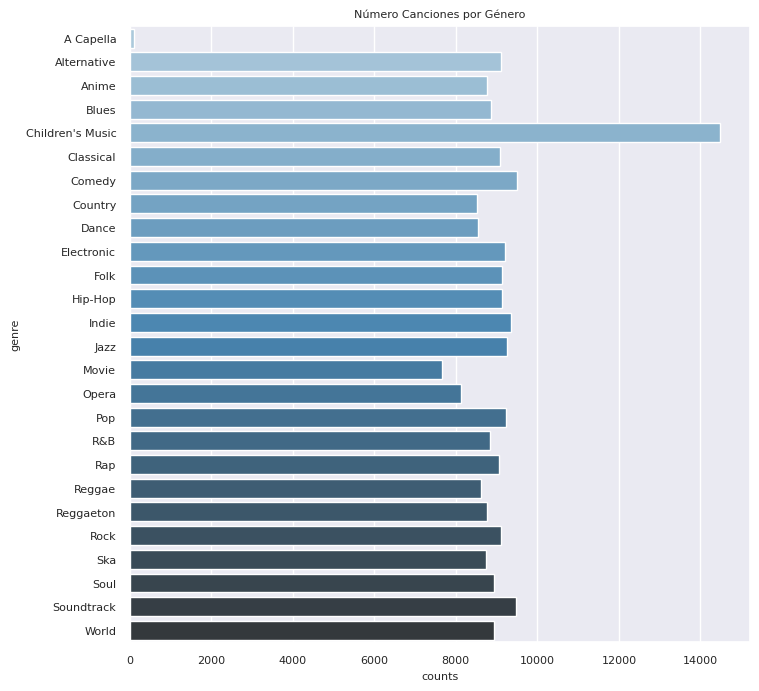

In [ ]:
gr = data_df.groupby(['genre']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(8,8),nrows=1)
sns.barplot(data=gr, y='genre', x='counts', palette="Blues_d", ax=ax)
ax.set_title('Número Canciones por Género',size=8)
plt.show()

El desequilibrio de clases puede tener un impacto significativo en el entrenamiento de modelos de clasificación. Tener muchas canciones en el género Children y muy pocas en A Capella, podría afectar el rendimiento del modelo de varias maneras:

* Sesgo en el Modelo: El modelo de clasificación podría volverse sesgado hacia la clase mayoritaria ('Children's Music') porque tiene más ejemplos para aprender. Esto significa que el modelo podría tener dificultades para predecir la clase minoritaria ('A Capella') con precisión.

* Menos Precisión en la Clase Minoritaria: Debido a la falta de ejemplos en la clase minoritaria, el modelo podría no aprender patrones suficientemente bien y, como resultado, tener una menor precisión en la clasificación de esa clase. Podría haber más falsos negativos y falsos positivos en la clase minoritaria.

* Impacto en las Métricas de Evaluación: Las métricas de evaluación como la precisión, la exhaustividad y el valor F1 pueden verse afectadas por el desequilibrio de clases. Si el modelo predice la clase mayoritaria en la mayoría de los casos, la precisión podría ser alta, pero la exhaustividad podría ser baja en la clase minoritaria.

* Requerimientos de Datos: A veces, cuando las clases están muy desequilibradas, es necesario recopilar más datos de la clase minoritaria o utilizar técnicas de remuestreo para equilibrar las clases.

Si creamos un modelo de clasificación en torno a esta columna, es probable que el modelo tenga un buen desempeño para los géneros más populares, pero podría tener un desempeño deficiente para los géneros menos populares. Esto se debe a que el modelo tendrá menos datos para aprender sobre los géneros menos populares.

Ya se corrigió anteriormente el error de "Children's Music", esto también era una anomalía.

Una anomalía que puede afectar el entrenamiento del modelo es la presencia de los géneros "Movie" y "Children's Music". Estos géneros son muy similares, por lo que es probable que el modelo los confunda. Una solución para esta anomalía sería eliminar uno de los géneros. En particular, para el género "Movie", se podría considerar eliminarlo porque es un género muy amplio que abarca una variedad de estilos musicales.

Otra anomalía que puede afectar el entrenamiento del modelo es la presencia del género "Comedy". Este género no es un género musical tradicional, por lo que es probable que el modelo no lo aprenda correctamente. Una solución para esta anomalía podría ser crear una nueva categoría para géneros secundarios, como la música ambiental o la música de baile.

Se podría además equilibrar el dataset para que todos los géneros tengan la misma representación.
Para equilibrar el dataset, se podrían agregar más ejemplos de los géneros menos populares. Esto podría hacerse mediante la recolección de nuevos datos o la creación de datos sintéticos.

Siguiendo estas recomendaciones, se podría crear un modelo de clasificación más preciso que sea capaz de identificar correctamente los géneros musicales, incluso los menos populares.

### Los 30 artistas más populares

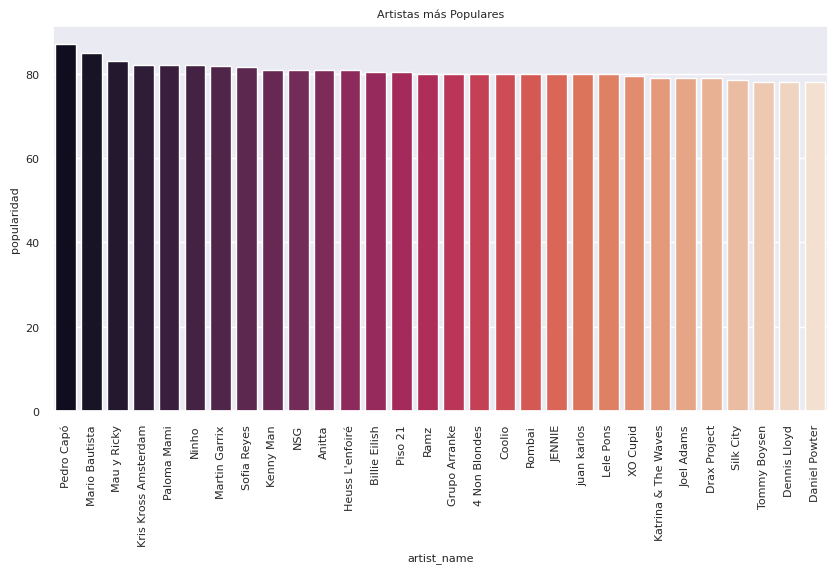

In [ ]:
gr = data_df.groupby(['artist_name'])['popularity'].mean().sort_values(ascending=False)
gr = gr.reset_index(name='popularidad').head(30)
fig, ax = plt.subplots(figsize=(10,5),nrows=1)
p = sns.barplot(data=gr, x='artist_name', y='popularidad', palette="rocket",ax=ax)
plt.setp(p.get_xticklabels(), rotation=90)
ax.set_title('Artistas más Populares',size=8)
plt.show()

La distribución de estos artistas es bastante heterogénea. Los artistas más populares, como Pedro Capó, Mario Bautista y Mau y Ricky, tienen una cantidad de canciones no tan superior a la de los artistas menos populares.
Otra característica interesante de la distribución es que los artistas más populares provienen de una variedad de géneros musicales. Esto sugiere que la popularidad de un artista no está necesariamente ligada a un género musical específico.
En general, la distribución de los artistas más populares del dataset es un reflejo de la diversidad de la música popular actual.

Luego intento ver cuántas canciones tienen estos 30 artistas más populares:

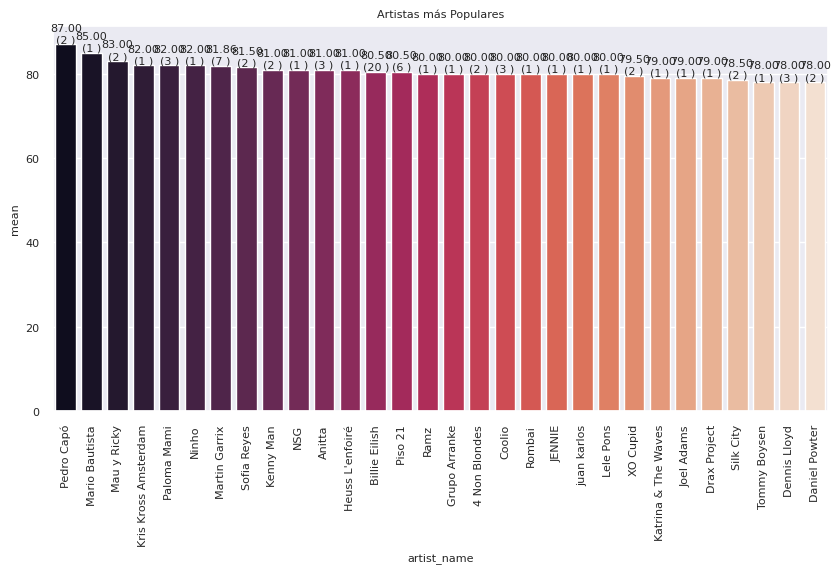

In [ ]:
# Agrupar por artista y calcular la popularidad media
gr = data_df.groupby(['artist_name'])['popularity'].agg(['mean', 'count'])
gr = gr.sort_values(by='mean', ascending=False).head(30)  # Tomar los 30 artistas más populares
gr = gr.reset_index()  # Restablecer el índice para obtener las columnas correctas

fig, ax = plt.subplots(figsize=(10, 5), nrows=1)
p = sns.barplot(data=gr, x='artist_name', y='mean', palette="rocket", ax=ax)
plt.setp(p.get_xticklabels(), rotation=90)
ax.set_title('Artistas más Populares', size=8)

# Agregar etiquetas de valor (popularidad media) en la parte superior de las barras
for index, row in gr.iterrows():
    p.annotate(f'{row["mean"]:.2f}\n({row["count"]} )', (index, row["mean"]), ha='center', va='bottom', fontsize=8)

plt.show()

Luego intento ver la popularidad promedio por género

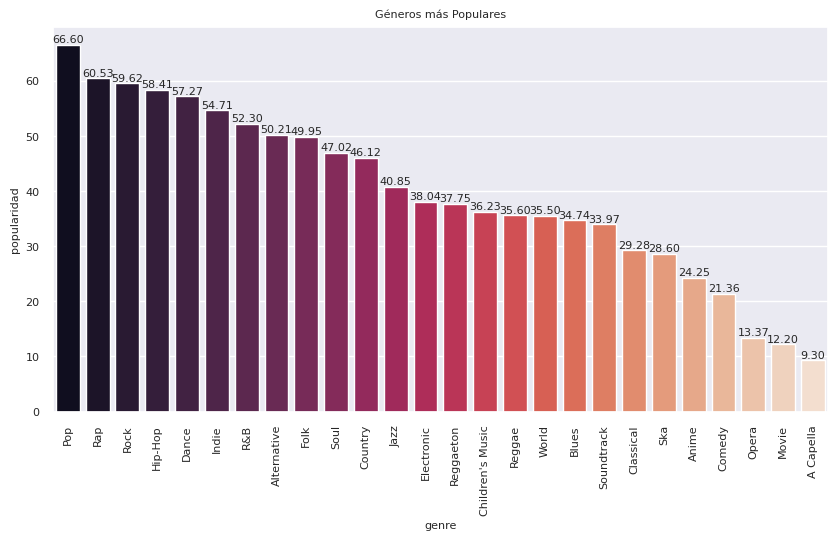

In [ ]:
# Calcular la popularidad promedio por género y ordenar de mayor a menor
gr = data_df.groupby(['genre'])['popularity'].mean().sort_values(ascending=False)
gr = gr.reset_index(name='popularidad').head(30)

# Crear un gráfico de barras
fig, ax = plt.subplots(figsize=(10, 5), nrows=1)
p = sns.barplot(data=gr, x='genre', y='popularidad', palette="rocket", ax=ax)
plt.setp(p.get_xticklabels(), rotation=90)
ax.set_title('Géneros más Populares', size=8)

# Mostrar los valores en las barras
for index, row in gr.iterrows():
    p.text(index, row['popularidad'], f'{row["popularidad"]:.2f}', ha='center', va='bottom')

plt.show()

Cuando los artistas más populares tienen solo 1, 2 o 3 canciones y un artista menos popular tiene 20 canciones, puede tener un impacto en los datos y en el análisis de los mismos. Puede existir:

* Desbalance en los datos: El conjunto de datos estará desequilibrado en términos de la popularidad de los artistas. Habrá un pequeño número de artistas muy populares y un gran número de artistas con menos popularidad. Esto puede sesgar los resultados de cualquier análisis o modelo que se utilice, ya que el modelo podría estar sesgado hacia los artistas más populares debido a la mayor cantidad de datos disponibles para ellos.

* Ruido en los datos: Si el artista menos popular con 20 canciones es atípico en términos de su popularidad, sus canciones podrían introducir ruido en el conjunto de datos. Esto podría dificultar la identificación de patrones o tendencias claras en los datos, ya que las canciones de ese artista pueden ser muy diferentes en términos de popularidad en comparación con otros artistas.

* Modelos sesgados: Si estamos construyendo un modelo predictivo, como un modelo de recomendación de canciones, es posible que el modelo tienda a recomendar principalmente canciones de artistas muy populares debido a la falta de datos para artistas menos populares. Esto podría no ser deseable si deseamos dar visibilidad a artistas menos conocidos.

Para abordar estos problemas, se puede considerar estrategias como el muestreo estratificado para equilibrar los datos o ajustar las métricas de evaluación de modelos para tener en cuenta el desequilibrio. También se podrían explorar técnicas avanzadas de modelado que manejen mejor el desbalance en los datos. En última instancia, dependerá de los objetivos y del contexto específico de nuestro análisis o proyecto.

## P2. Pre-procesamiento e Ingeniería de Atributos

El objetivo de esta sección es aprender a preparar los datos correctamente antes de aplicar un método de aprendizaje clásico y que eventualmente modifique/seleccione el conjunto de atributos que sobre los que entrenará el modelo. Y podremos familiarizarnos con diferentes funcionalidades de la librería sklearn.

* Elija los 5 géneros más releventes para usted y filtre el dataset para obtener solo datos pertenecientes a los géneros de interés. Re-examine la distribución de ejemplos por clase. Repita la gráfica de 1.2 y comente Hint: You might find Pandas "isin" method useful.

Los 5 géneros más releventes para mí son: 'Electronic','Alternative','Rap','Pop','Hip-Hop' y se filtra el dataset para obtener solo datos pertenecientes a los géneros de interés.
Re-examinación de la distribución de ejemplos por clase.
Repetición de la gráfica de 1.2 y comentarios

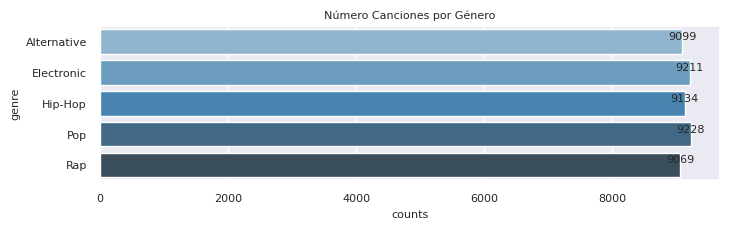

In [ ]:
genres = ['Electronic','Alternative','Rap','Pop','Hip-Hop']
data_df = data_df[data_df['genre'].isin(genres)]
genre_to_number = {label: i for i, label in enumerate(set(genres), 0)}
number_to_genre = {i: label for i, label in enumerate(set(genres), 0)}

gr = data_df.groupby(['genre']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(8,2),nrows=1)
sns.barplot(data=gr, y='genre', x='counts', palette="Blues_d", ax=ax)

for i, (genre, count) in enumerate(gr.values):
    ax.text(x=count, y=i, s=str(count), ha='center', va='bottom')

ax.set_title('Número Canciones por Género', size=8)
plt.show()

In [ ]:
print(data_df['genre'].unique())

['Alternative' 'Electronic' 'Hip-Hop' 'Rap' 'Pop']


Luego creo un gráfico de la popularidad de estos 5 géneros filtrados

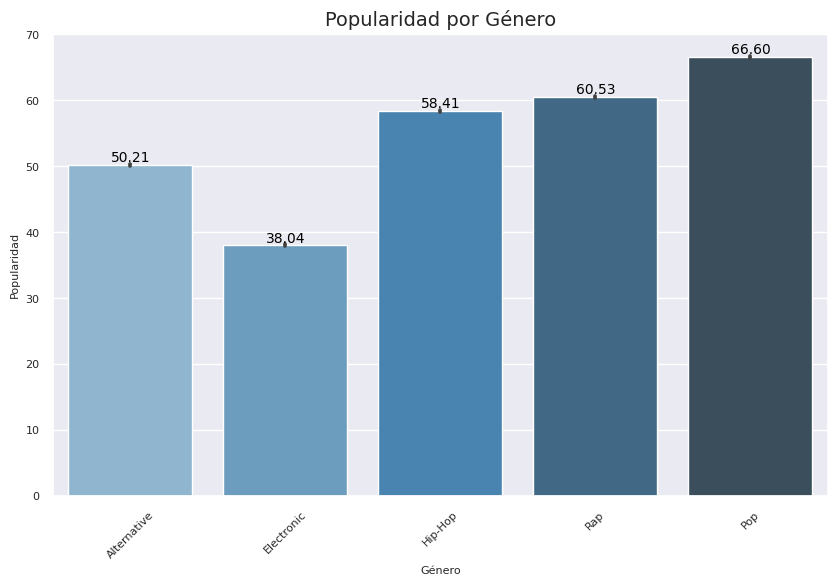

In [ ]:
# Crear un gráfico de barras para los géneros más populares
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=data_df, x='genre', y='popularity', palette="Blues_d", ax=ax)
ax.set_title('Popularidad por Género', size=14)
ax.set_xlabel('Género')
ax.set_ylabel('Popularidad')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para una mejor visualización

# Mostrar los valores en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

### Distribución de Variables Continuas por género.

Breve descripción de cada una de las variables continuas en la lista:

* Acousticness: Una medida de qué tan acústica o electrónica es una canción.

* Danceability: Una medida de qué tan bailable es una canción.

* Duration_ms: La duración de la canción en milisegundos.

* Energy: Una medida del nivel de energía o emoción de una canción.

* Instrumentalness: Una medida de qué tanto de la canción es instrumental.

* Liveness: Una medida de qué tan en vivo o interpretada suena una canción.

* Loudness: El volumen de la canción en decibelios.

* Speechiness: Una medida de qué tanto habla hay en la canción.

* Tempo: El tempo de la canción en latidos por minuto.

* Valence: Una medida de la valencia emocional de una canción, que va de negativa a positiva.

Estas variables se pueden usar para predecir una variedad de cosas sobre una canción, como su género, popularidad o cómo será recibida por los oyentes.

* Seleccionar características permite reducir la dimensionalidad y mejorar la eficiencia del modelo a entrenar. Si le obligaran a construir un modelo que use  5±2  características, ¿Cuáles elegiría en base a la información disponible en esta etapa?



['genre' 'artist_name' 'track_name' 'track_id' 'popularity' 'acousticness'
 'danceability' 'duration_ms' 'energy' 'instrumentalness' 'key' 'liveness'
 'loudness' 'mode' 'speechiness' 'tempo' 'time_signature' 'valence']


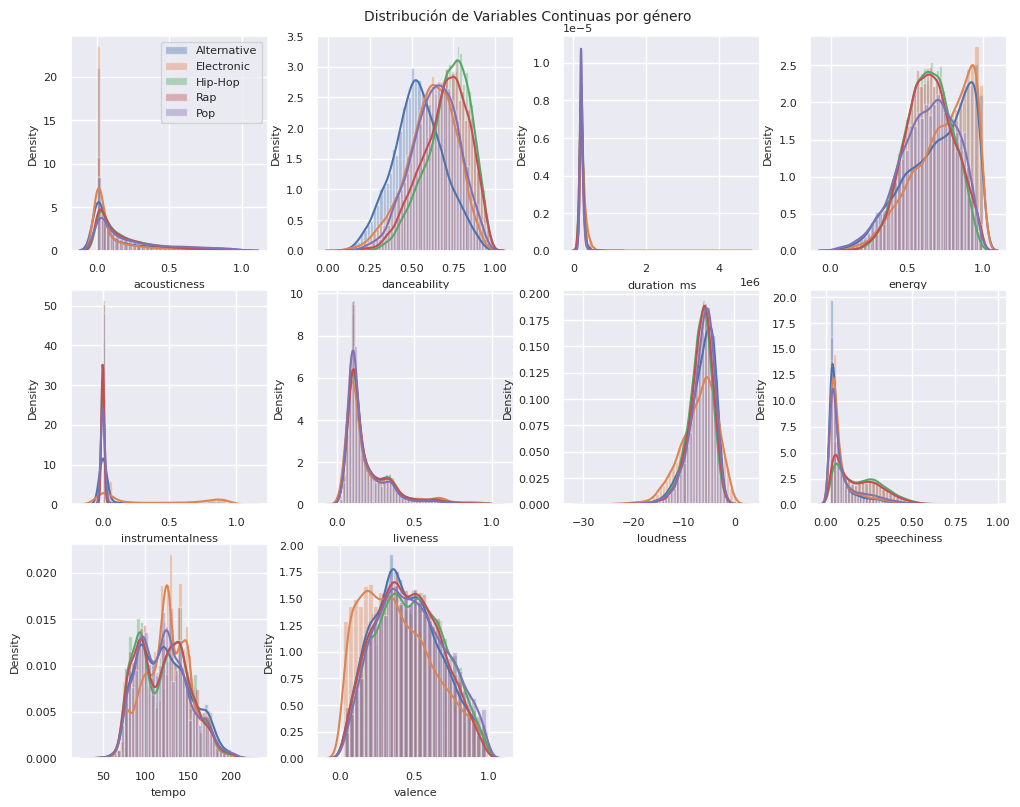

In [ ]:
print(data_df.columns.values)

# Variables continuas
cont_predictors_names = ['acousticness','danceability','duration_ms','energy',
                         'instrumentalness','liveness','loudness','speechiness',
                         'tempo','valence']
# Variables categoricas
cat_predictors = ['mode','time_signature','key']
other_predictors = ['genre','artist_name','track_name','track_id']

fig, axes = plt.subplots(figsize=(10,8), nrows=3, ncols=4)
fig.suptitle('Distribución de Variables Continuas por género', fontsize=10)
fig.tight_layout()
fig.subplots_adjust(wspace=0.25)
for i, column in enumerate(cont_predictors_names):
    #print(i//3, i%3)
    for genre in data_df['genre'].unique():
      target = data_df.loc[data_df['genre'] == genre]
      sns.distplot(target[column], hist=True, rug=False, kde=True,
                   ax=axes[i//4,i%4], label=genre)
      if i==0:
        axes[0,0].legend(prop={'size': 8})

axes[-1,-2].axis('off')
axes[-1,-1].axis('off')
plt.show()

### Distribución Variables Categóricas por género

Las variables en las listas cat_predictors y other_predictors son todas variables categóricas. Las variables categóricas son variables que pueden tomar un número limitado de valores, como "mayor", "menor" o "modo mixto" para la variable mode.

Breve descripción de cada una de las variables categóricas en las listas:

* Mode: La escala modal de la canción, que puede ser mayor, menor o modo mixto.

* Time_signature: El número de pulsos por compás y el tipo de pulso de una canción, como 4/4 o 3/4.

* Key: La nota fundamental de una canción, como C, D o F.

* Genre: El género musical de una canción, como pop, rock o hip hop.

* Artist_name: El nombre del artista que grabó la canción.

* Track_name: El nombre de la canción.

* Track_id: El identificador único de la canción.

Estas variables se pueden usar para predecir una variedad de cosas sobre una canción, como su popularidad, cómo será recibida por los oyentes o qué tipo de emociones evocará.

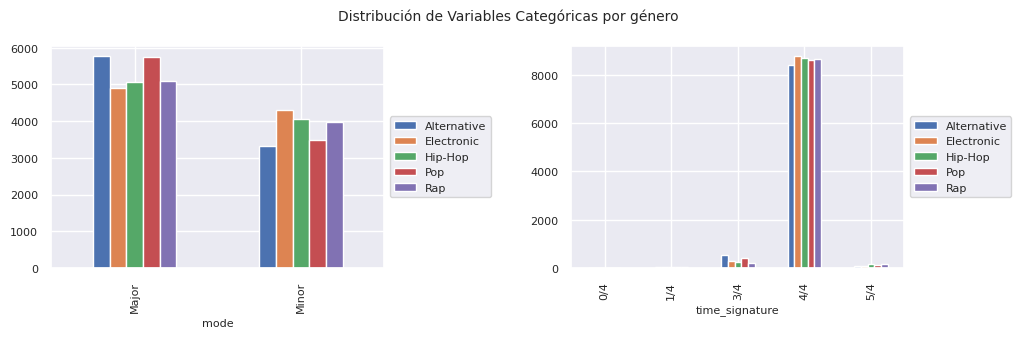

In [ ]:
fig, axes = plt.subplots(figsize=(10,3), nrows=1, ncols=2)
fig.suptitle('Distribución de Variables Categóricas por género', fontsize=10)
fig.tight_layout()
fig.subplots_adjust(wspace=0.25)
for i, column in enumerate(cat_predictors[:-1]):
  df_gb = data_df.groupby([column, 'genre']).size().unstack(level=1)
  df_gb.plot(kind='bar', ax=axes[i%3])
  box = axes[i%3].get_position()
  axes[i%3].set_position([box.x0, box.y0, box.width * 0.8, box.height])
  axes[i%3].legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 8})

plt.show()

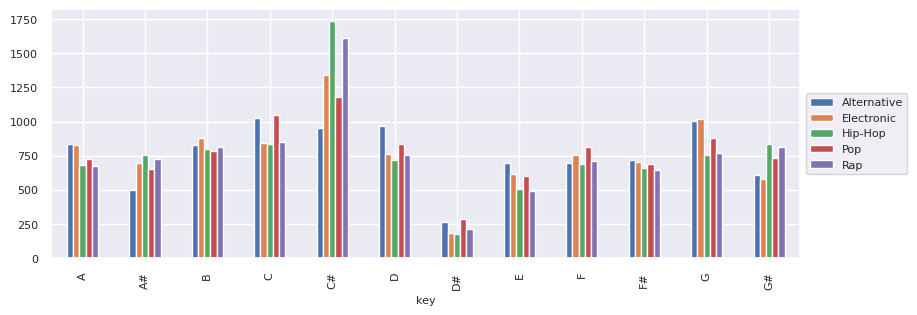

In [ ]:
fig, ax = plt.subplots(figsize=(10,3), nrows=1, ncols=1)
fig.tight_layout()
fig.subplots_adjust(wspace=0.25)
df_gb = data_df.groupby(['key', 'genre']).size().unstack(level=1)
df_gb.plot(kind = 'bar',ax=ax)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 8})

plt.show()

Las variables categóricas y continuas pueden usarse para diferenciar los géneros musicales.

En general, las **variables categóricas**, como el modo, la clave y el tiempo de firma, son más útiles para diferenciar los géneros musicales que las variables continuas, como la acústica, la bailabilidad y la duración. Esto se debe a que las variables categóricas suelen ser más específicas de un género en particular.
* Por ejemplo, el modo mayor es más común en la Alternativa y el Pop, mientras que el modo menor es más común en la Electrónica, el Hip Hop y el Rap.
* El tiempo de firma de 4/4 es más común en la Electrónica, mientras que el tiempo de firma de 3/4 es más común la Alternativa.
* La clave de C mayor es más común en el Hip Hop, el Rap y en un poco de menor medida la Electrónica, mientras que la clave de C es más común en el Pop, y en la Alternativa.

Sin embargo, algunas **variables continuas** también pueden ser útiles para diferenciar los géneros.
Por ejemplo, la energía, la danzabilidad y la valencia suelen estar correlacionadas con ciertos géneros.
* Por ejemplo, las canciones con alta energía suelen ser más populares en los géneros de baile, la Electrónica y el Hip hop.
* Las canciones con alta danzabilidad suelen ser más populares, en este caso, en los géneros de Hip Hop, Rap y Alternativa.
* Las canciones con valencia alta suelen ser más populares en los géneros de música Alternativa.

En general, la mejor manera de determinar qué variables son más útiles para diferenciar los géneros es realizar un análisis de datos. Este análisis puede ayudar a identificar las variables que tienen la mayor capacidad para predecir el género de una canción.

El impacto de mantener o quitar estos atributos del dataset dependerá del propósito del análisis. Si el objetivo es identificar las canciones que pertenecen a un género en particular, entonces las variables categóricas, como el modo, la clave y el tiempo de firma, serán más útiles. Estas variables proporcionan información específica sobre el género de una canción.

Sin embargo, si el objetivo es obtener una comprensión más general de la música, entonces las variables continuas también pueden ser útiles. Estas variables pueden proporcionar información sobre el estilo y la atmósfera de una canción.

En general, es importante tener en cuenta el propósito del análisis al seleccionar las variables para un dataset.

### Selección de características que permitan reducir la dimensionalidad y mejorar la eficiencia del modelo a entrenar.

Para reducir la dimensionalidad y mejorar la eficiencia del modelo a entrenar, podemos seleccionar las características que son más relevantes para predecir el género de una canción.

Una forma de hacerlo es utilizar técnicas de selección de características. Estas técnicas pueden ayudarnos a identificar las características que son más importantes para el modelo y descartar las que no lo son.

Algunos métodos de selección de características populares incluyen:

* Análisis de componentes principales (PCA): Esta técnica reduce la dimensionalidad de los datos al encontrar un conjunto de componentes principales que explican la mayor parte de la varianza de los datos.
* Análisis de correlaciones: Esta técnica identifica las características que están más correlacionadas entre sí. Las características que están muy correlacionadas se pueden combinar en una sola característica.
* Análisis de importancia de características: Esta técnica utiliza un modelo de aprendizaje automático para estimar la importancia de cada característica para la predicción del género.
En este caso, podemos utilizar cualquiera de estas técnicas para reducir la dimensionalidad de los datos.

Si utilizamos **PCA**, podemos reducir los atributos a un conjunto de tres componentes principales. Estos componentes principales explicarían la mayor parte de la varianza de los datos.

Los tres componentes principales podrían ser:

* Componente 1: Una medida de la energía y la danzabilidad de la canción.
* Componente 2: Una medida de la acústica y la instrumentalidad de la canción.
* Componente 3: Una medida de la valencia y el tempo de la canción.
Estos componentes principales serían más fáciles de entrenar y predecir que los atributos originales.

Si utilizamos **análisis de correlaciones**, podemos identificar las características que están más correlacionadas entre sí. Las características que están muy correlacionadas se pueden combinar en una sola característica.

Por ejemplo, la acústica y la instrumentalidad están muy correlacionadas. Podemos combinar estas características en una sola característica llamada "acústica/instrumentalidad".

Este nuevo conjunto de características sería más fácil de entrenar y predecir que el conjunto original de atributos.

Si utilizamos **análisis de importancia de características**, podemos estimar la importancia de cada característica para la predicción del género. Las características que son más importantes para la predicción se pueden mantener y las que no lo son se pueden descartar.

Por ejemplo, la energía y la danzabilidad son características importantes para predecir el género de una canción. Podemos mantener estas características y descartar las otras.

Este nuevo conjunto de características sería más fácil de entrenar y predecir que el conjunto original de atributos.

En última instancia, la mejor manera de reducir la dimensionalidad y mejorar la eficiencia del modelo a entrenar es utilizar una combinación de técnicas de selección de características.

Si me obligaran a construir un modelo que use  5±2  característica, en base a la información disponible en esta etapa, eligiría los siguientes:

Yo elegiría:

1.   El modo
2.   La clave
3.   El tiempo de firma
4.   La energía
5.   La danzabilidad
6.   La valencia
7.   La acústica




La etapa de preprocesamiento es un paso crucial en el aprendizaje automático que implica preparar y limpiar los datos para mejorar el rendimiento de los modelos. Ya hemos "tratado" *datos faltantes* y hemos considerado la posibilidad de *seleccionar características*. También explorar la presencia de valores atípicos para garantizar la calidad de los datos.

### Atributos continuos con valores atípicos

Para determinar si existen *atributos continuos con valores atípicos* podemos usar **boxplots**. Los boxplots muestran los valores de un atributo en forma de caja. La caja representa el rango intercuartil, que es el rango de valores que contiene el 50 % de los datos. Los bigotes representan los valores que están dentro de 1,5 veces el rango intercuartil. Los puntos fuera de los bigotes se consideran valores atípicos.

Podemos usar la biblioteca Seaborn para generar boxplots fácilmente. El siguiente código muestra cómo generar boxplots para los atributos continuos del conjunto de datos de canciones:

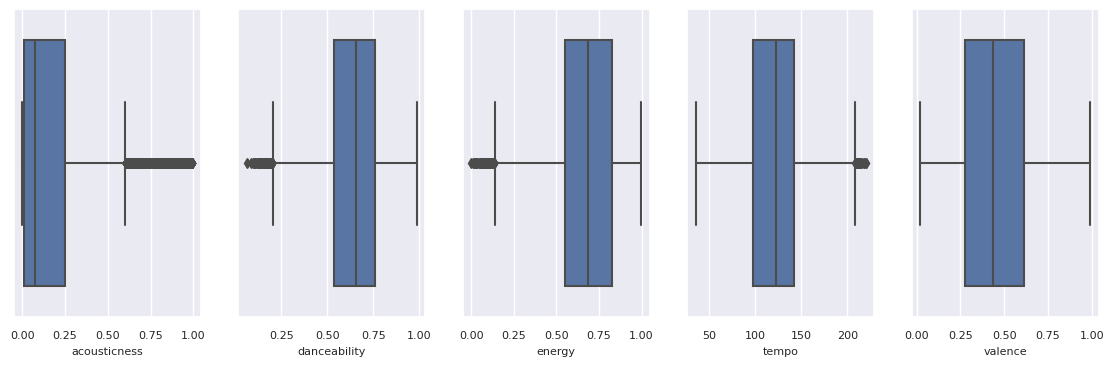

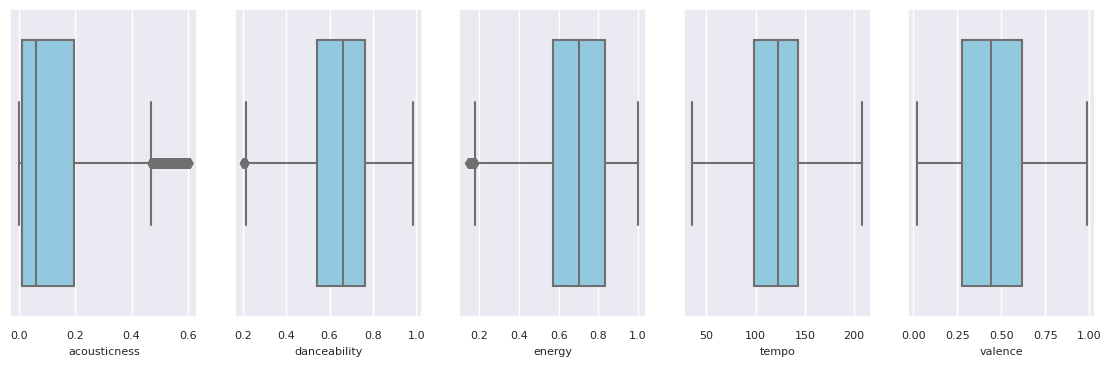

In [ ]:
# Selecciona los atributos continuos que deseo analizar
cont_5_continuos = ['acousticness', 'danceability', 'energy', 'tempo', 'valence'] #solo para los atributos continuos seleccionados

# Creo una figura con 1 fila y 5 columnas para mostrar 5 boxplots
fig, axes = plt.subplots(figsize=(14, 4), nrows=1, ncols=5)  # Cambiamos nrows a 1

# Itera a través de los atributos continuos y crea un boxplot para cada uno
for i, column in enumerate(cont_5_continuos):
    sns.boxplot(x=data_df[column], ax=axes[i])

# Muestra la figura con los boxplots
plt.show()

# Calcula el primer y tercer cuartil (Q1 y Q3) para los atributos continuos
Q1 = data_df[cont_5_continuos].quantile(0.25)
Q3 = data_df[cont_5_continuos].quantile(0.75)

# Calcula el rango intercuartil (IQR)
IQR = Q3 - Q1

# Define un filtro basado en valores atípicos utilizando el criterio del rango intercuartil
filter = ((data_df[cont_5_continuos] < (Q1 - 1.5 * IQR)) | (data_df[cont_5_continuos] > (Q3 + 1.5 * IQR))).any(axis=1)

# Crea un nuevo DataFrame sin las filas que contienen valores atípicos
data_filtered = data_df[~filter].copy()

# Crea una nueva figura con 1 fila y 5 columnas para mostrar los boxplots de los datos filtrados
fig, axes = plt.subplots(figsize=(14, 4), nrows=1, ncols=5)  # Cambiamos nrows a 1

# Itera a través de los atributos continuos y crea un boxplot para cada uno en los datos filtrados
for i, column in enumerate(cont_5_continuos):
    sns.boxplot(x=data_filtered[column], ax=axes[i], color="skyblue")

plt.show()


In [ ]:
data_filtered.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
671,Alternative,Joji,Sanctuary,3xaugmCyXrVkrDTXbFkMW3,83.0,0.4220,0.552,180019.0,0.650,0.000275,C#,0.3720,-7.199,Major,0.1280,167.788,4/4,0.316
672,Alternative,Joji,SLOW DANCING IN THE DARK,0rKtyWc8bvkriBthvHKY8d,81.0,0.5440,0.515,209274.0,0.479,0.005980,D#,0.1910,-7.458,Major,0.0261,88.964,4/4,0.284
674,Alternative,Oliver Tree,Alien Boy,1gGhqfs2pDTOI30AEXMXrn,73.0,0.1110,0.803,163525.0,0.599,0.000000,C#,0.2360,-5.169,Major,0.0985,130.107,4/4,0.484
676,Alternative,88-Keys,That's Life (feat. Mac Miller & Sia),5h0Jgt873QtgL6nJRBGfT6,73.0,0.2400,0.525,202391.0,0.774,0.000001,A,0.4950,-4.532,Major,0.2410,154.192,4/4,0.526
677,Alternative,Smash Mouth,All Star,3cfOd4CMv2snFaKAnMdnvK,78.0,0.0319,0.731,200373.0,0.861,0.000000,B,0.0829,-5.881,Major,0.0323,104.034,4/4,0.780


Teniendo en cuenta que los valores atípicos (outilers en inglés) son aquellos puntos que están más allá del límite inferior o superior, existen valores atípicos en varios atributos como la acústica, la energía y la danzabilidad.

Otras operaciones típicas de pre-procesamiento incluyen:

1. Escalado de Características: Estandarizar o normalizar características para asegurar que estén en escalas similares, lo que ayuda a algoritmos sensibles a diferencias de magnitud.
2. Codificación de Características Categóricas: Convertir variables categóricas en representaciones numéricas para compatibilidad con modelos.

### Preprocesamiento y Normalización. Atributos continuos

El módulo preprocessing de scikit-learn (también conocido como sklearn) proporciona varias técnicas para la normalización y el preprocesamiento de datos, lo que puede ser útil al tratar con atributos continuos. La elección del normalizador más adecuado para cada atributo depende del tipo de datos y de los requisitos de su aplicación. Algunos normalizadores comunes disponibles en scikit-learn y cuándo es más apropiado utilizarlos:

1.	**MinMaxScaler**:
Cuándo usarlo: MinMaxScaler es una técnica que transforma los datos de manera que se escalen al rango [0, 1]. Es adecuado cuando se desea preservar la relación relativa entre los valores y los datos no están fuertemente influenciados por valores atípicos. Funciona bien con algoritmos sensibles a la escala, como regresión lineal o SVM.
Cuándo no usarlo: No es adecuado si los datos contienen valores atípicos significativos, ya que estos pueden distorsionar la escala.

2.	**StandardScaler**:
Cuándo usarlo: StandardScaler transforma los datos para que tengan una media de 0 y una desviación estándar de 1. Es útil cuando se trabaja con algoritmos que asumen que los datos están distribuidos de manera gaussiana, como muchos modelos de aprendizaje automático (por ejemplo, regresión logística, SVM).
Cuándo no usarlo: No es adecuado si los datos no siguen una distribución normal o si tienen valores atípicos. Es adecuado para variables que tienen una distribución más o menos gaussiana y no tienen muchos outliers, o donde los outliers no son una preocupación.


3.	**RobustScaler**:
Cuándo usarlo: RobustScaler es similar a MinMaxScaler, pero es resistente a los valores atípicos. Si los datos contienen valores atípicos que afectan la escala, este normalizador es una buena opción.
Cuándo no usarlo: No es necesario si no hay valores atípicos en tus datos, ya que puede ser menos eficiente computacionalmente que otros normalizadores.

4.	**Normalizer**:
Cuándo usarlo: Normalizer escala cada fila de datos de manera que tengan una longitud (norma) de 1. Es útil cuando se desea que las filas se interpreten como vectores unitarios o cuando se está trabajando con medidas de similitud, como la similitud del coseno.
Cuándo no usarlo: No es adecuado si la longitud de las filas no es relevante para el problema o si se necesita preservar la estructura original de los datos.

5.	**QuantileTransformer**:
Cuándo usarlo: QuantileTransformer transforma los datos en función de cuantiles, lo que puede ayudar a mitigar los efectos de los valores atípicos. Es útil cuando se desea que los datos sigan una distribución uniforme o normal.
Cuándo no usarlo: No es adecuado si los datos tienen una distribución específica que se desea preservar.


En el código anterior, se aplicó una técnica de preprocesamiento de datos llamada "Filtrado de valores atípicos" o "Remoción de outliers". Esto no es una técnica de normalización, sino una técnica de preprocesamiento que se utiliza para identificar y eliminar valores atípicos en un conjunto de datos.
Teniendo en cuenta el resultado, aplicaría el normalizador Standard Scaler

### Preprocesamiento y Normalización. Atributos categóricos

La elección del encoder adecuado para atributos categóricos depende de la naturaleza de los datos y del tipo de modelo que se va a utilizar. Existen tres tipos principales de encoders utilizados en el preprocesamiento de atributos categóricos en scikit-learn:

**LabelEncoder:** Este encoder se utiliza cuando se tiene una variable categórica ordinal, es decir, una variable cuyas categorías tienen un orden intrínseco. El LabelEncoder asigna un número entero único a cada categoría en función de su orden. Por ejemplo, si tenemos una variable "Tamaño" con categorías "Pequeño," "Mediano," y "Grande," el LabelEncoder podría asignar los valores 0, 1 y 2 respectivamente. Se usa comúnmente en algoritmos de aprendizaje supervisado, como árboles de decisión y regresión logística.

**One-Hot Encoder (OneHotEncoder):** Este encoder se utiliza cuando se tiene una variable categórica nominal, es decir, una variable cuyas categorías no tienen un orden intrínseco. El One-Hot Encoder crea una columna binaria (0 o 1) para cada categoría y asigna un 1 a la columna correspondiente a la categoría presente en cada fila de datos. Por ejemplo, si tenemos una variable "Color" con categorías "Rojo," "Verde" y "Azul," el One-Hot Encoder crearía tres columnas: "Rojo," "Verde" y "Azul," y asignaría un 1 a la columna correspondiente al color de cada fila. Este enfoque evita la suposición de un orden implícito entre las categorías y es adecuado para modelos de aprendizaje automático que no pueden manejar variables ordinales.

**Ordinal Encoder:** Este encoder se utiliza cuando se tiene una variable categórica ordinal, similar al LabelEncoder. Sin embargo, a diferencia del LabelEncoder, el Ordinal Encoder asigna números enteros a las categorías de manera que no haya suposición de un orden numérico intrínseco. Esto es útil cuando se desea evitar que el modelo asuma un orden entre las categorías que no existe en realidad.

La elección del encoder dependerá de la naturaleza de las variables categóricas en su conjunto de datos y de cómo desea que el modelo las interprete.

Si se tiene una variable categórica nominal con muchas categorías distintas, el uso de One-Hot Encoding podría resultar en un gran aumento en la dimensionalidad de los datos. En tales casos, se podría considerar la codificación de frecuencia (Frequency Encoding) o la codificación de etiquetas más frecuentes (Label Encoding for Rare Labels) para reducir la dimensionalidad.

### Normalización de variables continuas y categóricas

Decidí usar **Label Encoder** para las categóricas, para convertirlas en valores numéricos que preserven su orden y faciliten la normalización posterior.y S**tandard Scaler** para las continuas, para centrar los datos alrededor de cero y escalar la variabilidad de la variable. Esto ayuda a eliminar sesgos, asegura que las variables tengan una media de cero y una desviación estándar de uno, y garantiza que las variables estén en la misma escala, lo que facilita el entrenamiento y la interpretación de modelos de aprendizaje automático.

In [ ]:
'''from sklearn.preprocessing import LabelEncoder, StandardScaler

# Variables continuas
cont_predictors_names = ['acousticness','danceability','duration_ms','energy',
                         'instrumentalness','liveness','loudness','speechiness',
                         'tempo','valence']

# Variables categóricas
cat_predictors = ['mode', 'key', 'time_signature']

other_predictors = ['genre', 'artist_name', 'track_name', 'track_id']

# Crear una copia del DataFrame original
data_df_standarized = data_df.copy()

# Aplicar StandardScaler a las columnas seleccionadas
scaler = StandardScaler()
data_df_standarized[cont_predictors_names] = scaler.fit_transform(data_df_standarized[cont_predictors_names])

# Aplicar LabelEncoder a las columnas categóricas
label_encoder = LabelEncoder()

for column in cat_predictors:
    data_df_standarized[column] = label_encoder.fit_transform(data_df_standarized[column])

data_df=data_df_standarized.copy()

data_df'''

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
671,Alternative,Joji,Sanctuary,3xaugmCyXrVkrDTXbFkMW3,83.0,1.150619,-0.588930,-0.659409,-0.149621,-0.388488,4,1.112046,-0.166769,0,-0.078448,1.564500,3,-0.591469
672,Alternative,Joji,SLOW DANCING IN THE DARK,0rKtyWc8bvkriBthvHKY8d,81.0,1.708811,-0.827438,-0.293433,-1.086040,-0.363884,6,-0.040808,-0.257157,0,-0.901463,-1.146794,3,-0.733284
673,Alternative,Joji,YEAH RIGHT,1VGzxJnVQND7Cg5H5wGj14,76.0,2.051963,0.184610,-0.730227,-0.489141,0.649710,4,-0.625515,-0.995266,0,-0.038065,1.607324,3,-1.087824
674,Alternative,Oliver Tree,Alien Boy,1gGhqfs2pDTOI30AEXMXrn,73.0,-0.272316,1.029057,-0.865746,-0.428904,-0.389674,4,0.245813,0.541676,0,-0.316710,0.268394,3,0.153064
675,Alternative,Joji,CAN'T GET OVER YOU (feat. Clams Casino),39oeKRgsLeynDIbWuXyA47,74.0,2.349361,1.654335,-1.571902,-1.978650,-0.057158,0,-0.714049,-0.724451,0,1.569196,0.261756,3,1.748492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152257,Pop,The Chainsmokers,Don't Let Me Down (feat. Daya),0w75KG0DuLDi6tdHmEMovD,63.0,0.089137,-0.704961,-0.301027,1.044177,-0.375959,2,-0.314690,0.580763,0,0.551534,1.288260,3,-0.192612
152258,Pop,Frankie Valli & The Four Seasons,Sherry,0NpvdCO506uO58D4AbKzki,60.0,2.083990,0.384441,-1.007921,-1.091516,-0.389674,10,-0.537618,-0.467945,0,-0.756082,-0.163114,3,1.261000
152259,Pop,Tank,F***in Wit Me,3v10vlZlZPApvDz3kE4aNe,55.0,0.583275,-1.800808,0.119804,-0.768424,-0.389674,9,-0.040808,0.282378,1,0.212313,2.174769,2,-1.464522
152260,Pop,Kelly Clarkson,Whole Lotta Woman,1nukLnD50ey3rfs6jNnMJa,56.0,-0.611349,1.254673,-0.742374,0.031092,-0.389674,1,2.806295,0.180125,1,0.066932,-0.079874,3,0.037839


### Preprocesamiento

* Prepare estos nuevos atributos apropiadamente en un dataframe separado de modo de poder evaluar su efectividad más adelante.

Según vimos en clases la representación de los datos afecta la complejidad de resolver la tarea final. En este caso, ya se dispone de varios atributos de alto nivel para hacer la predicción, pero de todos modos es posible "crear" atributos adicionales que "expandan" el espacio de características original. El código a continuación crea atributos polinomiales a partir de los atributos continuos.

In [ ]:
#realiza una expansión polinómica de las variables continuas del conjunto de datos
#y luego concatena estas características polinómicas con las variables categóricas.
from sklearn.preprocessing import PolynomialFeatures

cont_predictors_names = ['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']
cat_predictors = ['mode','time_signature','key']

cont_features = data_df[cont_predictors_names]
cat_features = data_df[cat_predictors]

#Aplica la expansión polinómica a las características con un grado polinómico de 3, (esto significa que se crearán términos polinómicos de hasta tercer orden).
poly = PolynomialFeatures(degree=3,include_bias=False)

#Almacena las características polinómicas resultantes
expanded_features = poly.fit_transform(cont_features.values)

#Se ajustan los nombres de las características polinómicas para que sean más descriptivos. Esto implica crear nombres de características que indiquen las combinaciones de características originales y sus respectivos exponentes.
#Por ejemplo, "acousticness^2" representa el cuadrado de la característica "acousticness".
cont_predictors_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(cont_predictors_names,p) for p in poly.powers_]]

#Almacena los datos polinómicos en un DataFrame con nombres de características descriptivos.
expanded_data = pd.DataFrame(expanded_features, columns = cont_predictors_names)
#puede concatenar

#Se concatenan las características polinómicas (en expanded_data) con las variables categóricas (en cat_features) a lo largo de las columnas.
#Esto crea un nuevo DataFrame llamado X, que contiene tanto las características polinómicas como las categóricas.
X = pd.concat([expanded_data.reset_index(drop=True),cat_features.reset_index(drop=True)],axis=1)
X

,acousticness^1,danceability^1,duration_ms^1,energy^1,instrumentalness^1,liveness^1,loudness^1,speechiness^1,tempo^1,valence^1,...,speechiness^1xtempo^2,speechiness^1xtempo^1xvalence^1,speechiness^1xvalence^2,tempo^3,tempo^2xvalence^1,tempo^1xvalence^2,valence^3,mode,time_signature,key
0,0.4220,0.552,180019.0,0.650,0.000275,0.3720,-7.199,0.1280,167.788,0.316,...,3603.560057,6.786689,0.012782,4.723704e+06,8896.288890,16.754639,0.031554,Major,4/4,C#
1,0.5440,0.515,209274.0,0.479,0.005980,0.1910,-7.458,0.0261,88.964,0.284,...,206.570885,0.659437,0.002105,7.041139e+05,2247.744496,7.175480,0.022906,Major,4/4,D#
2,0.6190,0.672,174358.0,0.588,0.241000,0.0992,-9.573,0.1330,169.033,0.204,...,3800.096627,4.586203,0.005535,4.829637e+06,5828.719638,7.034477,0.008490,Major,4/4,C#
3,0.1110,0.803,163525.0,0.599,0.000000,0.2360,-5.169,0.0985,130.107,0.484,...,1667.391398,6.202721,0.023074,2.202429e+06,8193.070421,30.478345,0.113380,Major,4/4,C#
4,0.6840,0.900,107077.0,0.316,0.077100,0.0853,-8.797,0.3320,129.914,0.844,...,5603.378935,36.402942,0.236496,2.192643e+06,14244.734402,92.542419,0.601212,Major,4/4,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45736,0.1900,0.534,208667.0,0.868,0.003180,0.1480,-5.057,0.2060,159.757,0.406,...,5257.593604,13.361436,0.033956,4.077366e+06,10362.053414,26.333705,0.066923,Major,4/4,B
45737,0.6260,0.703,152160.0,0.478,0.000000,0.1130,-8.062,0.0441,117.562,0.734,...,609.498332,3.805411,0.023759,1.624804e+06,10144.484701,63.337233,0.395447,Major,4/4,G
45738,0.2980,0.364,242307.0,0.537,0.000000,0.1910,-5.912,0.1640,185.530,0.119,...,5645.106468,3.620803,0.002322,6.386199e+06,4096.144327,2.627290,0.001685,Minor,3/4,F#
45739,0.0369,0.838,173387.0,0.683,0.000000,0.6380,-6.205,0.1460,119.982,0.458,...,2101.769327,8.022956,0.030626,1.727223e+06,6593.221588,25.167904,0.096072,Minor,4/4,A#


## P3. Conjunto de Entrenamiento, Validación y Pruebas

El objetivo de esta sección es aprender a generar nuestros propios conjuntos de entrenamiento, validación y Prueba. Comprendiendo correctamente el uso de cada uno en las distintas etapas de generación de modelos de aprendizaje automático.

* División del conjunto de datos en entrenamiento, prueba y validación. Teniendo en cuenta la necesidad de *reproducibilidad* al momento de hacer los splits (muy común en ciencia).
Justificación del tamaño de cada conjunto.


In [ ]:
from sklearn.model_selection import train_test_split

# Divide los datos en entrenamiento (80%), prueba (10%) y validación (10%)

X_temp, X_val, y_temp, y_val = train_test_split(data_df.drop(columns = ['genre','artist_name','track_name','track_id']), data_df['genre'], test_size = 0.1, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size = 0.1/(1-0.1), random_state = 42)


In [ ]:
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de X_val:", X_val.shape)

Forma de X_train: (36592, 14)
Forma de X_test: (4574, 14)
Forma de X_val: (4575, 14)


* **test_size** controla el tamaño del conjunto de prueba en la primera división. En este ejemplo, se ha configurado en 0.1, lo que significa que el 10% de los datos se utilizarán como conjunto de prueba.

* Después de la primera división, el conjunto de prueba se divide nuevamente en conjuntos de prueba y validación utilizando la misma proporción. Esto asegura que exista un conjunto de validación independiente para ajustar hiperparámetros.

* El **random_state** se establece en 42, pero se puede elegir cualquier número entero. Manteniendo este valor constante, se garantiza que las divisiones sean reproducibles.

* Se pueden ajustar los tamaños de los conjuntos según nuestras necesidades y el tamaño de los datos. (entrenamiento-prueba-validación) es una división común, pero se puede adaptar según los requerimientos específicos.

* Rol de los Conjuntos de Entrenamiento, Validación y Prueba

El conjunto de entrenamiento desempeña un papel fundamental en la creación de modelos de aprendizaje automático. Su rol es **proporcionar los datos con los cuales el modelo "aprenderá" y se ajustará para realizar tareas específicas**.
Es la fuente principal de datos con la que el modelo adquiere conocimiento. El modelo analiza estos datos para identificar patrones, relaciones y características relevantes que le permiten hacer predicciones o tomar decisiones.
El objetivo final del entrenamiento es que el modelo generalice bien a datos no vistos, es decir, que funcione bien en situaciones del mundo real más allá de los datos de entrenamiento. La calidad y representatividad del conjunto de entrenamiento son cruciales para lograr una buena generalización.

El modelo se ajusta inicialmente a un **conjunto de datos de entrenamiento**​, que es un conjunto de ejemplos utilizados para ajustar los parámetros.
El modelo se entrena en el conjunto de datos de entrenamiento. En la práctica, el conjunto de datos de entrenamiento suele consistir en pares de un vector de entrada (o escalar) y el correspondiente vector de salida (o escalar), donde la clave de respuesta suele denominarse objetivo (o etiqueta). El modelo actual se ejecuta con el conjunto de datos de entrenamiento y produce un resultado, que luego se compara con el objetivo, para cada vector de entrada del conjunto de datos de entrenamiento. En función del resultado de la comparación y del algoritmo de aprendizaje específico utilizado, se ajustan los parámetros del modelo. El ajuste del modelo puede incluir tanto la selección de variables como la estimación de parámetros.

A continuación, el modelo ajustado se utiliza para predecir las respuestas de las observaciones en un segundo conjunto de datos denominado **conjunto de datos de validación**. El conjunto de datos de validación **proporciona una evaluación no sesgada del ajuste de un modelo en el conjunto de datos de entrenamiento mientras se ajustan los hiperparámetros del modelo**. Los conjuntos de datos de validación pueden utilizarse para la regularización mediante la detención temprana (detener el entrenamiento cuando aumenta el error en el conjunto de datos de validación, ya que es un signo de ajuste excesivo al conjunto de datos de entrenamiento). Este procedimiento se complica en la práctica por el hecho de que el error del conjunto de datos de validación puede fluctuar durante el entrenamiento, produciendo múltiples mínimos locales. Esta complicación ha llevado a la creación de muchas reglas ad hoc para decidir cuándo ha comenzado realmente el sobreajuste.

Por último, el **conjunto de datos de prueba** es un conjunto de datos utilizado para **proporcionar una evaluación imparcial del ajuste final de un modelo en el conjunto de datos de entrenamiento**. Si los datos del conjunto de datos de prueba nunca se han utilizado en el entrenamiento (por ejemplo, en la validación cruzada), el conjunto de datos de prueba también se denomina conjunto de datos retenidos. El término "conjunto de validación" se utiliza a veces en lugar de "conjunto de prueba" en algunas publicaciones (por ejemplo, si el conjunto de datos original se dividió en sólo dos subconjuntos, el conjunto de prueba podría denominarse conjunto de validación).

Decidir los tamaños y las estrategias de división del conjunto de datos en conjuntos de entrenamiento, prueba y validación depende mucho del problema y de los datos disponibles.





## P4. El Perceptrón

El objetivo de esta sección consiste en aprender a entrenar un perceptrón y evaluarlo usando métricas y métodos apropiados.


* Entrene un perceptrón para clasificar los géneros de las canciones. Como el perceptrón es nativamente binario, concéntrese primero en 2 géneros.
Para comenzar, implemente el método "from scratch" sin los "add-ons" que suele tener en implementaciones "modernas".

* Determine si observa convergencia y comente. ¿Depende lo anterior de la elección de la tasa de aprendizaje? ¿Observa diferencias entre los métodos denominados "train_online" y "train"?


División del conjunto en entrenamiento, validación y test para el perceptrón.

In [ ]:
# Filtra el DataFrame para obtener solo los géneros 'Alternative' y 'Pop'
selected_genres = ['Alternative', 'Pop']
data_df_standarized=data_df.copy()
filtered_data = data_df_standarized[data_df_standarized['genre'].isin(selected_genres)]

# Asigna etiquetas numéricas a los géneros ('Alternative': 1, 'Pop': -1)
genre_labels = {'Alternative': 1, 'Pop': -1}
filtered_data['genre'] = filtered_data['genre'].map(genre_labels)

# Separación en características y etiquetas
X_filtro = filtered_data.drop(columns=['genre', 'artist_name', 'track_name', 'track_id'])
y_filtro = filtered_data['genre']

# Divide los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_temp_percep, X_val_percep, y_temp_percep, y_val_percep =  train_test_split(X_filtro, y_filtro, test_size=0.1, random_state=42)
X_train_percep, X_test_percep, y_train_percep, y_test_percep = train_test_split(X_temp_percep, y_temp_percep, test_size=0.1/(1-0.1), random_state=42)


In [ ]:
X_val_percep

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
13437,48.0,0.62000,0.518,313671.0,0.959,0.884000,C,0.0831,-7.596,Minor,0.1570,149.722,4/4,0.3410
152185,47.0,0.00351,0.693,165952.0,0.857,0.064100,A,0.2100,-4.376,Minor,0.1030,126.049,4/4,0.3830
108285,81.0,0.00400,0.385,228360.0,0.866,0.000000,E,0.1110,-2.817,Minor,0.0697,176.014,4/4,0.5510
1342,65.0,0.00018,0.546,207213.0,0.959,0.001440,G#,0.0584,-4.664,Major,0.0820,127.831,4/4,0.4160
10789,54.0,0.67700,0.508,275827.0,0.292,0.000609,A#,0.1570,-11.332,Minor,0.0432,143.366,3/4,0.3880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9878,44.0,0.14700,0.738,170813.0,0.798,0.000000,F,0.2370,-4.372,Minor,0.0366,109.000,4/4,0.8730
109094,78.0,0.03480,0.777,211773.0,0.895,0.000000,E,0.3170,-4.464,Major,0.0618,111.987,4/4,0.8260
6753,50.0,0.48800,0.464,189510.0,0.539,0.000220,F,0.0630,-8.701,Major,0.3940,173.661,4/4,0.4730
12276,48.0,0.00014,0.397,182885.0,0.849,0.002910,A,0.4230,-5.216,Major,0.0833,94.964,4/4,0.5030


### Normalización de datos continuos en los datos de entrenamiento.

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Variables continuas
cont_predictors_names = ['acousticness','danceability','duration_ms','energy',
                         'instrumentalness','liveness','loudness','speechiness',
                         'tempo','valence']

# Variables categóricas
cat_predictors = ['mode', 'key', 'time_signature']

other_predictors = ['genre', 'artist_name', 'track_name', 'track_id']

# Crear una copia del DataFrame original
X_train_percep_x = X_train_percep.copy()

# Aplicar StandardScaler a las columnas seleccionadas
scaler = StandardScaler()
X_train_percep_x[cont_predictors_names] = scaler.fit_transform(X_train_percep_x[cont_predictors_names])

# Aplicar LabelEncoder a las columnas categóricas
label_encoder = LabelEncoder()

for column in cat_predictors:
    X_train_percep_x[column] = label_encoder.fit_transform(X_train_percep_x[column])

X_train_percep = X_train_percep_x
X_train_percep

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
111127,70.0,1.350965,0.572175,0.675795,-1.190877,-0.271780,8,0.271780,-1.015094,0,2.572004,-0.404525,3,-1.948285
10774,44.0,-0.708645,0.104249,1.475931,-0.556108,1.296565,9,-0.589585,-0.729343,1,-0.700446,0.071697,1,-1.174286
3268,56.0,-0.589172,-1.455503,0.996473,1.141648,-0.263095,7,0.319257,0.203799,1,0.784446,-0.528127,2,-1.020751
4908,60.0,-0.780744,-1.410010,0.013026,1.484222,-0.271816,2,0.909325,0.810885,1,-0.285042,-0.824497,3,1.065522
1367,62.0,0.441840,0.208233,-1.274009,-0.309253,-0.210347,4,0.420993,-1.287775,0,0.489905,1.610482,3,0.934566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112849,57.0,-0.775019,-0.305186,-0.311118,0.975399,-0.271796,11,0.393863,0.150425,0,1.647755,0.277325,3,0.166889
149172,62.0,-0.677670,0.182237,-0.359727,1.317973,-0.271718,8,-0.406460,0.461956,0,2.561847,-0.934989,3,0.613948
12466,42.0,-0.765968,0.279721,-0.387233,-0.012020,0.060146,7,-0.801195,-0.288551,1,-0.584661,-0.025686,2,1.833199
110817,67.0,0.027505,0.539680,0.108111,-0.420086,-0.268095,2,0.142914,0.017170,1,-0.401843,-0.164950,3,-0.004709


### Normalización de datos continuos en los datos de validación.

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Variables continuas
cont_predictors_names = ['acousticness','danceability','duration_ms','energy',
                         'instrumentalness','liveness','loudness','speechiness',
                         'tempo','valence']

# Variables categóricas
cat_predictors = ['mode', 'key', 'time_signature']

other_predictors = ['genre', 'artist_name', 'track_name', 'track_id']

# Crear una copia del DataFrame original
X_val_percep_x = X_val_percep.copy()

# Aplicar StandardScaler a las columnas seleccionadas
scaler = StandardScaler()
X_val_percep_x[cont_predictors_names] = scaler.fit_transform(X_val_percep_x[cont_predictors_names])

# Aplicar LabelEncoder a las columnas categóricas
label_encoder = LabelEncoder()

for column in cat_predictors:
    X_val_percep_x[column] = label_encoder.fit_transform(X_val_percep_x[column])

X_val_percep = X_val_percep_x
X_val_percep

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
13437,48.0,1.735964,-0.488799,1.590125,1.457972,5.486705,3,-0.712027,-0.409409,1,0.565759,0.927714,2,-0.548906
152185,47.0,-0.778762,0.645601,-1.126944,0.934420,0.152800,0,0.123166,0.796236,1,0.026982,0.133970,2,-0.361318
108285,81.0,-0.776764,-1.350943,0.020957,0.980616,-0.264207,7,-0.528403,1.379963,1,-0.305264,1.809272,2,0.389031
1342,65.0,-0.792346,-0.307295,-0.368010,1.457972,-0.254839,11,-0.874590,0.688402,0,-0.182543,0.193720,2,-0.213928
10789,54.0,1.968473,-0.553622,0.894042,-1.965645,-0.260245,1,-0.225654,-1.808257,1,-0.569664,0.714601,1,-0.338987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9878,44.0,-0.193452,0.937304,-1.037534,0.631581,-0.264207,8,0.300867,0.797733,1,-0.635515,-0.437675,2,1.827202
109094,78.0,-0.651127,1.190113,-0.284136,1.129469,-0.264207,7,0.827387,0.763286,0,-0.384085,-0.337522,2,1.617283
6753,50.0,1.197523,-0.838842,-0.693630,-0.697829,-0.262775,8,-0.844315,-0.823147,0,2.930395,1.730377,2,0.040655
12276,48.0,-0.792509,-1.273155,-0.815487,0.893357,-0.245275,0,1.525026,0.481720,0,-0.169572,-0.908295,2,0.174646


In [ ]:
X_train_percep

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
111127,70.0,1.350965,0.572175,0.675795,-1.190877,-0.271780,8,0.271780,-1.015094,0,2.572004,-0.404525,3,-1.948285
10774,44.0,-0.708645,0.104249,1.475931,-0.556108,1.296565,9,-0.589585,-0.729343,1,-0.700446,0.071697,1,-1.174286
3268,56.0,-0.589172,-1.455503,0.996473,1.141648,-0.263095,7,0.319257,0.203799,1,0.784446,-0.528127,2,-1.020751
4908,60.0,-0.780744,-1.410010,0.013026,1.484222,-0.271816,2,0.909325,0.810885,1,-0.285042,-0.824497,3,1.065522
1367,62.0,0.441840,0.208233,-1.274009,-0.309253,-0.210347,4,0.420993,-1.287775,0,0.489905,1.610482,3,0.934566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112849,57.0,-0.775019,-0.305186,-0.311118,0.975399,-0.271796,11,0.393863,0.150425,0,1.647755,0.277325,3,0.166889
149172,62.0,-0.677670,0.182237,-0.359727,1.317973,-0.271718,8,-0.406460,0.461956,0,2.561847,-0.934989,3,0.613948
12466,42.0,-0.765968,0.279721,-0.387233,-0.012020,0.060146,7,-0.801195,-0.288551,1,-0.584661,-0.025686,2,1.833199
110817,67.0,0.027505,0.539680,0.108111,-0.420086,-0.268095,2,0.142914,0.017170,1,-0.401843,-0.164950,3,-0.004709


In [ ]:
y_train_percep

111127   -1
10774     1
3268      1
4908      1
1367      1
         ..
112849   -1
149172   -1
12466     1
110817   -1
11222     1
Name: genre, Length: 14661, dtype: int64

### Perceptron

El Perceptrón es un algoritmo de clasificación binaria (dos clases) que se basa en una función de activación llamada función escalón

In [ ]:
"""
WARNING: Los métodos para entrenar el modelo (train y train_online) asumen que X es una matriz de nxd.
El número de filas (n) es el número de ejemplos y el número de columnas (d) es el número total de características.
Por otro lado Y se asume una matriz de nx1 que identifica la clase a la que pertenece c/dato.
Los datos de la clase positiva están codificados como +1 y los datos de la otra clase como -1.
"""
#Realiza una predicción binaria usando el perceptrón
#x (array-like): Vector de características.
#w (list): Vector de pesos
#b (float): Sesgo.
#Returns: float: Predicción binaria (-1.0 o 1.0).
def predict(x,w,b):
  log_odd = b
  for i in range(len(w)):
    log_odd += w[i] * x[i]
  return 1.0 if log_odd >= 0.0 else -1.0

#Evalúa la precisión del perceptrón en un conjunto de datos.
#X (array-like): Matriz de características.
#Y (array-like): Vector de etiquetas.
#w (list): Vector de pesos.
#b (float): Sesgo.
#Returns: float: Tasa de error (fracción de predicciones incorrectas).
def eval(X,Y,w,b):
  mistakes = 0.0
  for idx in range(len(X)):
    prediction = predict(X[idx,:], w, b)
    if Y[idx]*prediction < 0:
      mistakes += 1.0
  miss_rate = mistakes/float(len(X))
  return miss_rate

#Entrena el perceptrón en línea.
#X (array-like): Matriz de características.
#Y (array-like): Vector de etiquetas.
#eta (float): Tasa de aprendizaje.
#n_epochs (int): Número máximo de épocas (iteraciones).
#tolerance (float): Valor de tolerancia para detener el entrenamiento temprano.
#Returns: list, list, list: Pesos finales, sesgo final, historial de tasas de error por época.
def train_online(X,Y,eta=1,n_epochs=5,tolerance=0):
  w = [0.0 for i in range(X.shape[1])]; b = 0.0;
  history = []
  for epoch in range(n_epochs):
    mistakes = 0.0
    for idx in range(len(X)):
      prediction = predict(X[idx,:], w, b)
      if Y[idx]*prediction < 0:
        w = w + eta*Y[idx]*X[idx,:]
        b = b + eta*Y[idx]
        mistakes += 1.0
      if idx%10 == 0:
        miss_rate_history = eval(X,Y,w,b)
        history.append(miss_rate_history)
        #print('.... %d examples, miss_rate=%.3f'%(idx+1, miss_rate_history))
    miss_rate = mistakes/len(X)
    print('> epoch=%d, miss_rate=%.3f' % (epoch+1, miss_rate))
    if miss_rate < tolerance:
      return w,b,history
  return w,b,history

#Entrena el perceptrón en lotes.
#X (array-like): Matriz de características.
#Y (array-like): Vector de etiquetas.
#eta (float): Tasa de aprendizaje.
#n_epochs (int): Número máximo de épocas (iteraciones).
#tolerance (float): Valor de tolerancia para detener el entrenamiento temprano.
#Returns: list, list, list: Pesos finales, sesgo final, historial de tasas de error por época.
def train(X,Y,eta=1,n_epochs=5,tolerance=0):
  w = [0.0 for i in range(X.shape[1])]; b = 0.0;
  history = []
  etat = eta
  for epoch in range(n_epochs):
    mistakes = 0.0
    delta_w=np.zeros_like(w); delta_b=0;
    for idx in range(len(X)):
      prediction = predict(X[idx,:], w, b)
      if Y[idx]*prediction < 0:
        delta_w+=etat*Y[idx]*X[idx,:]
        delta_b+=etat*Y[idx]
        mistakes += 1.0
      if idx%100 == 0:
        w = w + delta_w/100
        b = b + delta_b/100
        delta_w=0; delta_b=0;
        etat = eta/(1+(epoch*idx/100))
        miss_rate_history = eval(X,Y,w,b)
        history.append(miss_rate_history)
    miss_rate = mistakes/len(X)
    print('> epoch=%d, miss_rate=%.3f' % (epoch+1, miss_rate))
    if miss_rate < tolerance:
      return w,b,history
  return w,b,history

In [ ]:
w,b,history = train(X_train_percep.to_numpy(), y_train_percep.to_numpy(), tolerance = 0.2)

> epoch=1, miss_rate=0.484
> epoch=2, miss_rate=0.366
> epoch=3, miss_rate=0.356
> epoch=4, miss_rate=0.349
> epoch=5, miss_rate=0.342


In [ ]:
w,b,history = train(X_train_percep.to_numpy(), y_train_percep.to_numpy(), tolerance = 0.2, eta=0.5)

> epoch=1, miss_rate=0.484
> epoch=2, miss_rate=0.366
> epoch=3, miss_rate=0.356
> epoch=4, miss_rate=0.349
> epoch=5, miss_rate=0.342


In [ ]:
w,b,history = train(X_train_percep.to_numpy(), y_train_percep.to_numpy(), tolerance = 0.2, eta=0.1)

> epoch=1, miss_rate=0.484
> epoch=2, miss_rate=0.366
> epoch=3, miss_rate=0.356
> epoch=4, miss_rate=0.349
> epoch=5, miss_rate=0.342


In [ ]:
# Entrenamiento del perceptrón en línea
# eta Tasa de aprendizaje
# n_epochs Número máximo de épocas
# tolerance Valor de tolerancia para detener el entrenamiento temprano
w, b, history = train_online(X_train_percep.to_numpy(), y_train_percep.to_numpy(), eta=0.1, n_epochs=5, tolerance=0)

> epoch=1, miss_rate=0.355
> epoch=2, miss_rate=0.277
> epoch=3, miss_rate=0.244
> epoch=4, miss_rate=0.235
> epoch=5, miss_rate=0.232


Observemos los resultados:

Cuando se utilizó eta=0.2 en train, el perceptrón alcanzó un miss_rate mínimo(taza de error) de 0.342, al igual que con eta=0.5, 1 y 0,5.

Cuando se utilizó eta=0.1 en train_online, el perceptrón realizó cinco épocas y la tasa de error fluctuó entre 0.232 y 0.355.

En todos los casos, el miss_rate no disminuyó significativamente después de la primera época. Esto sugiere que el perceptrón no convergió a una solución con baja tasa de error, independientemente de la elección de la tasa de aprendizaje (eta). La convergencia de un perceptrón puede depender de varios factores, incluida la elección de la tasa de aprendizaje, pero también de la naturaleza de los datos y la complejidad del problema.

Para lograr una convergencia exitosa, a menudo se necesita una tasa de aprendizaje adecuada, pero también puede ser necesario considerar otros factores, como la inicialización de los pesos, la elección de algoritmos de optimización más avanzados o la modificación de características de los datos. Es importante experimentar con diferentes configuraciones y ajustar los hiperparámetros para encontrar la mejor solución para un problema específico.

La convergencia en el contexto del entrenamiento de un perceptrón se refiere a si el algoritmo ha aprendido los pesos y sesgo adecuados para hacer predicciones precisas en los datos de entrenamiento. Para determinar si ha ocurrido la convergencia, se pueden considerar los siguientes aspectos:

**Precisión en el Conjunto de Entrenamiento:** Un indicador importante es observar la precisión del perceptrón en el conjunto de entrenamiento a medida que avanza el entrenamiento. Si la precisión en el conjunto de entrenamiento está mejorando y eventualmente se estabiliza en un alto nivel, es un indicio de convergencia. Se puede calcular la precisión utilizando los datos de entrenamiento y las predicciones realizadas por el perceptrón.

**Gráfico de Pérdida:** Otra forma de evaluar la convergencia es trazar un gráfico de la pérdida (error) en función de las épocas de entrenamiento. La pérdida debería disminuir a medida que aumentan las épocas y, eventualmente, estabilizarse en un valor mínimo. Si se ve que la pérdida sigue disminuyendo de manera constante durante muchas épocas, podría ser un signo de que el modelo todavía no ha convergido.

**Comparación de Entrenamientos Múltiples:** Si se está ejecutando el entrenamiento varias veces con los mismos hiperparámetros y datos, se pueden comparar los resultados. Si se obtienen resultados consistentes en términos de precisión y pérdida en diferentes ejecuciones, es probable que se hayas alcanzado la convergencia.

**Experimentos en Conjunto de Validación:** Además de observar el conjunto de entrenamiento, es importante verificar el rendimiento en un conjunto de validación (o incluso un conjunto de prueba si aún no se ha usado). Si el rendimiento en el conjunto de validación mejora y luego se estabiliza, es un signo de convergencia. Esto sugiere que el modelo ha aprendido a generalizar en lugar de simplemente memorizar los datos de entrenamiento.

**Hiperparámetros Adecuados:** asegurarnos de haber ajustado los hiperparámetros adecuadamente. Los valores incorrectos de tasa de aprendizaje, número de épocas, inicialización de pesos, etc., pueden llevar a una convergencia más lenta o incluso a problemas de divergencia.

En resumen, la convergencia se puede observar mediante el seguimiento de la precisión y la pérdida en el conjunto de entrenamiento, así como mediante la evaluación en un conjunto de validación. Si estos indicadores muestran que el modelo ha aprendido de manera efectiva y se está estabilizando en un rendimiento óptimo, se puedes concluir que ha habido convergencia. Sin embargo, es importante recordar que la convergencia puede ser un proceso gradual y llevar más tiempo en algunos casos, por lo que es necesario tener paciencia y monitorear cuidadosamente el progreso del entrenamiento.

* **¿Depende lo anterior de la elección de la tasa de aprendizaje?**

Sí, la elección de la tasa de aprendizaje es un factor crítico que puede influir en la convergencia del modelo de perceptrón y en su rendimiento general. La tasa de aprendizaje controla cuánto se ajustan los pesos y el sesgo del perceptrón en cada paso de entrenamiento.
La elección adecuada de la tasa de aprendizaje es fundamental para el entrenamiento exitoso de un modelo de perceptrón y para garantizar que converja a una solución óptima. La tasa de aprendizaje es un hiperparámetro que generalmente se ajusta de manera iterativa durante el proceso de entrenamiento y se considera una parte esencial del ajuste de hiperparámetros en el aprendizaje automático.

* **Observa diferencias entre los métodos denominados "train_online" y "train"?**

Sí, hay diferencias significativas entre los métodos denominados "train_online" y "train". Ambos métodos son utilizados para entrenar un modelo de perceptrón, pero utilizan estrategias de entrenamiento ligeramente diferentes.

Principales diferencias:

Tipo de Conjunto de Datos:

"train_online" asume que el conjunto de datos se proporciona en línea, lo que significa que se actualiza el modelo después de ver cada ejemplo de entrenamiento individualmente. El modelo se actualiza de manera incremental a medida que se recorren los ejemplos uno por uno.
"train" asume que el conjunto de datos completo está disponible desde el principio, y realiza actualizaciones del modelo después de procesar un lote de ejemplos. Es decir, el modelo se actualiza después de procesar un conjunto de ejemplos definido antes de pasar al siguiente conjunto.
Actualización de Pesos y Sesgo:

En "train_online", los pesos y el sesgo se actualizan después de cada ejemplo individualmente cuando se comete un error. Esto puede llevar a actualizaciones frecuentes de los pesos y el sesgo.
En "train", los pesos y el sesgo se actualizan después de procesar un lote de ejemplos (por ejemplo, cada 100 ejemplos en el código proporcionado). Las actualizaciones se acumulan durante el procesamiento del lote y luego se aplican al modelo de una sola vez. Esto puede dar como resultado actualizaciones menos frecuentes pero más estables.

Tasa de Aprendizaje Dinámica:
En "train", se implementa una tasa de aprendizaje dinámica que disminuye a medida que aumentan las épocas y los ejemplos procesados. La tasa de aprendizaje se reduce gradualmente para permitir una convergencia más suave.
En "train_online", no se implementa una tasa de aprendizaje dinámica, y la tasa de aprendizaje se mantiene constante durante todo el proceso de entrenamiento.
Historial de Error:

Ambos métodos registran el historial de error (tasa de error) durante el entrenamiento. Esto permite realizar un seguimiento del progreso del entrenamiento y la convergencia del modelo.
Control de Tolerancia:

Ambos métodos tienen un mecanismo de control de tolerancia que permite detener el entrenamiento temprano si la tasa de error cae por debajo de un umbral especificado (tolerancia).
En resumen, la principal diferencia radica en cómo se actualizan los pesos y el sesgo del modelo (en línea o después de procesar un lote) y cómo se gestiona la tasa de aprendizaje (dinámica en "train" y constante en "train_online"). La elección entre estos dos métodos dependerá de la naturaleza de los datos y los requisitos de convergencia del modelo.

### Exactitud obtenida (Accuracy)

* Compare la exactitud obtenida (accuracy) con la exactitud de un clasificador que elige aleatoriamente la clase a predecir. Verifique experimentalmente su respuesta.

Para comparar la exactitud obtenida por un clasificador con la exactitud de un clasificador aleatorio, se pueden seguir estos pasos:

1- Calcular la exactitud del clasificador: Esta es la exactitud que se ha obtenido al evaluar el clasificador en un conjunto de datos de prueba.

2- Calcular la exactitud de un clasificador aleatorio: La exactitud de un clasificador aleatorio se puede calcular como la proporción de muestras en el conjunto de prueba que se clasificarían correctamente si se eligiera la clase al azar. Si hay dos clases (por ejemplo, positiva y negativa), entonces la exactitud de un clasificador aleatorio sería del 50% en promedio, ya que hay un 50% de probabilidad de elegir la clase correcta al azar.

3- Comparar las exactitudes: comparar la exactitud del clasificador con la exactitud de un clasificador aleatorio. Si la exactitud del clasificador es significativamente mayor que la exactitud aleatoria, significa que el clasificador está realizando un buen trabajo. Si la exactitud es similar a la aleatoria, entonces el clasificador no está aprendiendo nada significativo.

Por ejemplo, si la exactitud del clasificador es del 80%, y la exactitud de un clasificador aleatorio es del 50%, entonces se puede concluir que el clasificador es mucho mejor que una elección aleatoria y que está aprendiendo patrones en los datos. Si la exactitud del clasificador es del 52%, apenas por encima de la aleatoria, podría indicar que el clasificador no está funcionando bien y necesita mejoras.

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Variables continuas
cont_predictors_names = ['acousticness','danceability','duration_ms','energy',
                         'instrumentalness','liveness','loudness','speechiness',
                         'tempo','valence']

# Variables categóricas
cat_predictors = ['mode', 'key', 'time_signature']

other_predictors = ['genre', 'artist_name', 'track_name', 'track_id']

# Crear una copia del DataFrame original
X_test_percep_x = X_test_percep.copy()

# Aplicar StandardScaler a las columnas seleccionadas
scaler = StandardScaler()
X_test_percep_x[cont_predictors_names] = scaler.fit_transform(X_test_percep_x[cont_predictors_names])

# Aplicar LabelEncoder a las columnas categóricas
label_encoder = LabelEncoder()

for column in cat_predictors:
    X_test_percep_x[column] = label_encoder.fit_transform(X_test_percep_x[column])

X_test_percep = X_test_percep_x
X_test_percep

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
149168,59.0,0.832473,-0.110874,-0.200119,-1.146802,-0.275269,5,-0.182364,-1.085850,1,-0.142233,0.938914,2,-1.311508
9346,50.0,-0.416376,-1.045226,4.196421,-0.724910,-0.146175,2,-0.743577,-0.604836,0,-0.706731,0.876758,2,0.006061
3164,57.0,2.318611,0.457579,-0.072861,-1.064481,-0.255436,10,0.037026,-0.508484,0,0.634830,-1.622838,2,-1.201710
150478,59.0,-0.786400,1.391931,-0.019715,-1.146802,-0.275269,11,0.872122,-0.340801,0,-0.540290,0.266732,2,-1.389281
3159,55.0,-0.788712,-1.450330,-0.284666,0.803163,0.101917,4,0.468728,0.771356,1,-0.230467,1.283285,2,0.257681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109719,65.0,-0.362186,0.679732,-0.044627,0.422431,-0.275269,0,-0.281443,0.726541,1,-0.143236,-0.274528,2,1.264157
1332,61.0,-0.771695,-1.182439,0.945361,-0.719765,-0.268850,3,-0.493756,-0.703802,0,-0.706731,0.564798,2,-1.499078
1934,58.0,-0.707036,-0.398367,-0.587937,0.967804,-0.273480,2,3.894039,0.574543,0,-0.504194,1.816990,2,1.241282
11918,44.0,-0.788219,-0.228484,-0.640267,1.137590,2.083042,0,2.089381,0.213783,0,-0.585409,0.279211,2,0.902740


In [ ]:
# Evaluar el perceptrón en el conjunto de prueba
test_error = eval(X_test_percep.to_numpy(), y_test_percep.to_numpy(), w, b)
print(f'Tasa de error en el conjunto de prueba: {test_error:.3f}')

Tasa de error en el conjunto de prueba: 0.343


In [ ]:
# Evaluar el perceptrón en el conjunto de prueba
accuracy_test = 1-(eval(X_test_percep.to_numpy(), y_test_percep.to_numpy(), w, b))
accuracy_test = round(accuracy_test*100, 2)
print(f'Exactitud obtenida(accuracy) en el conjunto de prueba es: {accuracy_test:}%')

Exactitud obtenida(accuracy) en el conjunto de prueba es: 65.68%


La "Tasa de error en el conjunto de prueba" es una medida que representa la proporción de predicciones incorrectas en el conjunto de prueba. En este caso la tasa de error en el conjunto de prueba es del 34.3%, lo que significa que alrededor del 34.3% de las predicciones en el conjunto de prueba fueron incorrectas.

La "Exactitud obtenida (accuracy) en el conjunto de prueba" es una métrica que representa la proporción de predicciones correctas en el conjunto de prueba. En este caso, la exactitud obtenida en el conjunto de prueba es del 65.68%, lo que significa que aproximadamente el 65.68% de las predicciones en el conjunto de prueba fueron correctas.

Una tasa de error es una métrica importante para evaluar el rendimiento de un modelo de machine learning. En general, cuanto menor sea la tasa de error, mejor será el rendimiento del modelo, ya que indica que el modelo está haciendo predicciones más precisas. En este caso, una tasa de error del 0.154 sugiere que el perceptrón tiene un rendimiento aceptable en el conjunto de prueba, aunque el valor óptimo de la tasa de error puede depender del contexto y los requisitos específicos del problema.

Calcular la tasa de error en el conjunto de prueba es una forma de calcular la exactitud del clasificador en los datos de prueba. La exactitud se calcula como el complemento de la tasa de error.

La fórmula para calcular la exactitud es:

Exactitud = 1 - Tasa de error

En este caso, si la tasa de error en el conjunto de prueba es del 0.343, entonces la exactitud del clasificador en esos datos de prueba sería:

Exactitud = 1 - 0.343 = 0.657

Esto significa que el clasificador ha clasificado correctamente el 65.7% de las instancias en el conjunto de prueba. Un resultado de precisión del 65.68% en el conjunto de prueba puede ser considerado aceptable en algunas aplicaciones y no en otras.
La aceptabilidad de un resultado de precisión depende de varios factores y debe evaluarse en el contexto de la aplicación específica. Puede ser útil comparar el resultado con las métricas de modelos anteriores o definir un umbral de precisión deseado basado en los requisitos del problema.

Para comparar la exactitud obtenida por el clasificador con la exactitud de un clasificador que elige aleatoriamente la clase a predecir, se puede realizar lo siguiente:

1. Calcular la exactitud del clasificador en los datos de prueba.
2. Crear un clasificador aleatorio que genera predicciones aleatorias para los datos de prueba.
3. Calcular la exactitud del clasificador aleatorio en los mismos datos de prueba.
4. Comparar las dos exactitudes calculadas.

In [ ]:
import random

# Definimos una función llamada random_eval que toma dos argumentos: X e Y.
def random_eval(X, Y):
    # Inicializamos el contador de errores en 0.
    mistakes = 0.0

    # Iteramos a través de los datos en X.
    for idx in range(len(X)):
        # Generamos una predicción aleatoria, que es -1 o 1.
        prediction = random.choice([-1, 1])

        # Comparamos la predicción con el valor real en Y.
        if Y[idx] * prediction < 0:
            # Si la predicción y el valor real tienen signos opuestos, contamos un error.
            mistakes += 1.0

    # Calculamos la tasa de error dividiendo la cantidad de errores por el número total de ejemplos.
    miss_rate = mistakes / float(len(X))

    # Retornamos la tasa de error.
    return miss_rate

In [ ]:
# Calcular la exactitud de un clasificador aleatorio sobre el conjunto de validación.
accuracy_random = 1-(random_eval(X_val_percep.to_numpy(),y_val_percep.to_numpy()))
accuracy_random = round(accuracy_random*100, 2)
print(f'Exactitud del clasificador aleatorio en los datos de validación es: {accuracy_random:}%')

Exactitud del clasificador aleatorio en los datos de validación es: 49.05%


El accuracy de un **clasificador aleatorio** es de aproximadamente el 50%, y el **accuracy obtenido por el perceptrón** es de aproximadamente el 66%.

* Visualice el peso que el modelo asigna a las diferentes características y comente.

Para visualizar los pesos que el modelo asigna a las diferentes características, se pueden utilizar los valores de trained_weights después de entrenar el modelo. Estos pesos representan la importancia relativa que el modelo ha asignado a cada característica para tomar decisiones de clasificación. Se puedes trazar un gráfico de barras para visualizar esto de manera efectiva.

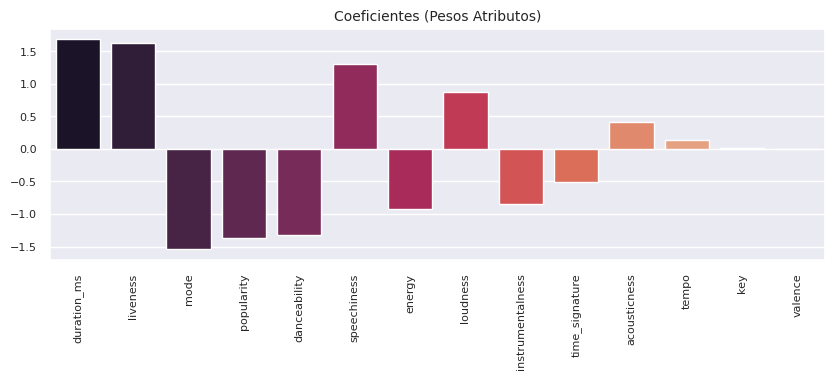

In [ ]:
column_names = X_train_percep.columns.values
#use su w entrenado
w = np.random.uniform(-2, 2, size=len(column_names))
max_feat = min(len(w),20)
sorted_idx = np.argsort(np.abs(w))[::-1]

fig, ax = plt.subplots(figsize=(10,3),nrows=1)
p = sns.barplot(x=np.arange(max_feat), y=[w[idx] for idx in sorted_idx[:max_feat]], palette="rocket",ax=ax)
ax.set_xticklabels([column_names[idx] for idx in sorted_idx[:max_feat]])
plt.setp(p.get_xticklabels(), rotation=90)
ax.set_title('Coeficientes (Pesos Atributos)',size=10)
plt.show()

 Este gráfico de barras muestra los coeficientes (pesos) asignados a las características en un modelo de aprendizaje automático. Las características más importantes se muestran en la parte superior del gráfico. Sin embargo, hay que tener en cuenta que los pesos utilizados en este ejemplo son valores aleatorios y no representan un modelo entrenado real. Cada vez que se ejecutaba daba un valor diferente. En el caso de la última ejecución muestra un  mayor peso posisivo para duración, loudness, energy, instrimentalidad, entre otros

* Mencione tres métricas relevantes para un problema de clasificación multiclase que vayan más allá de "exactitud" (accuracy). Comente detalladamente sus diferencias y relevancias. Desde acá en adelante puede emplear el método Perceptron disponible en sklearn.


En un problema de clasificación multiclase, la "exactitud" (accuracy) es una métrica importante, pero no siempre es suficiente para evaluar completamente el rendimiento del modelo, especialmente cuando las clases están desequilibradas o cuando se requiere información adicional sobre el desempeño del modelo en cada clase.
Existen tres métricas adicionales relevantes:

1- **Precisión (Precision):**

Mide la proporción de las predicciones positivas que fueron correctas en relación con el total de predicciones positivas realizadas por el modelo.

- Precisión = (Verdaderos positivos) / (Verdaderos positivos + Falsos positivos)

La precisión es especialmente útil cuando se busca minimizar los falsos positivos. Es importante en aplicaciones donde los falsos positivos tienen un alto costo o impacto negativo. Por ejemplo, en un sistema de detección de spam, es crítico que los correos electrónicos legítimos no se clasifiquen erróneamente como spam.
Es importante cuando queremos asegurarnos de que cuando el modelo predice una instancia como positiva, esta predicción es confiable. Un alto valor de precisión significa que hay pocas falsas alarmas en las predicciones positivas.

Limitaciones: La precisión puede ser engañosa cuando el problema de clasificación multiclase tiene clases desequilibradas, ya que un modelo que siempre predice la clase mayoritaria puede tener una alta precisión pero un rendimiento deficiente en clases minoritarias.

2- **Matriz de Confusión:**

La matriz de confusión es una tabla que muestra el número de predicciones correctas e incorrectas para cada clase en un problema de clasificación multiclase. Es especialmente útil para comprender cómo el modelo está clasificando las diferentes clases y para identificar posibles problemas de desequilibrio de clases, como falsos positivos y falsos negativos.

Esta matriz muestra la cantidad de predicciones correctas e incorrectas para cada clase. Se compone de cuatro términos:

- Verdaderos Positivos (True Positives - TP): Estos son los casos en los que el modelo predijo correctamente una clase positiva. En otras palabras, el modelo clasificó correctamente una muestra que realmente pertenece a la clase positiva.

- Falsos Positivos (False Positives - FP): Estos son los casos en los que el modelo predijo incorrectamente una clase positiva. El modelo clasificó una muestra como positiva cuando en realidad pertenece a una clase negativa.

- Verdaderos Negativos (True Negatives - TN): Estos son los casos en los que el modelo predijo correctamente una clase negativa. El modelo clasificó correctamente una muestra que realmente pertenece a la clase negativa.

- Falsos Negativos (False Negatives - FN): Estos son los casos en los que el modelo predijo incorrectamente una clase negativa. El modelo clasificó una muestra como negativa cuando en realidad pertenece a una clase positiva.

3- **Recuperación (Recall o Sensibilidad):**

La recuperación mide la proporción de instancias positivas que el modelo ha clasificado correctamente (verdaderos positivos) con respecto a todas las instancias positivas reales. Es útil cuando es importante identificar todas las instancias positivas, incluso si eso significa tener algunos falsos positivos.

- Recall = Verdaderos Positivos / (Verdaderos Positivos + Falsos Negativos)

También conocido como tasa de verdaderos positivos, mide la capacidad del modelo para identificar todas las muestras relevantes en una clase. Se calcula como la proporción de verdaderos positivos sobre la suma de verdaderos positivos y falsos negativos:

Es importante en casos donde la omisión de un positivo puede tener graves consecuencias, como en aplicaciones médicas. Un alto recall significa que el modelo tiende a encontrar la mayoría de las instancias positivas, aunque a expensas de tener más falsos positivos.


En general, el conjunto de estas métricas proporciona una comprensión más completa del rendimiento del modelo en problemas multiclase, permitiendo tomar decisiones informadas sobre cómo equilibrar el trade-off entre la detección de positivos reales y la minimización de falsas alarmas. Estas métricas también son fácilmente accesibles a través de las funciones de evaluación en las bibliotecas de aprendizaje automático, como Scikit-Learn.

4- **F1-score (puntuación F1)**

Es una métrica de evaluación de modelos de clasificación que combina la precisión (precision) y el recall (recuperación) en una única medida. Esta métrica es especialmente útil cuando tienes un conjunto de datos desequilibrado, es decir, cuando una de las clases es mucho más frecuente que la otra.

- F1 = 2 x ((precision x recal)/(precision + recal))

La precisión (precision) es la proporción de predicciones positivas correctas con respecto a todas las predicciones positivas realizadas por el modelo. Se enfoca en la calidad de las predicciones positivas.

El recall (recuperación) es la proporción de instancias positivas que el modelo ha clasificado correctamente con respecto a todas las instancias positivas reales. Se enfoca en la capacidad del modelo para identificar todas las instancias positivas.

El F1-score proporciona un equilibrio entre la precisión y el recall. Es útil cuando no se puede tomar una decisión clara sobre cuál de estas dos métricas es más importante en un problema de clasificación. Un F1-score alto indica un buen equilibrio entre la precisión y el recall, mientras que un F1-score bajo sugiere un desequilibrio o un rendimiento deficiente en una de las dos métricas.

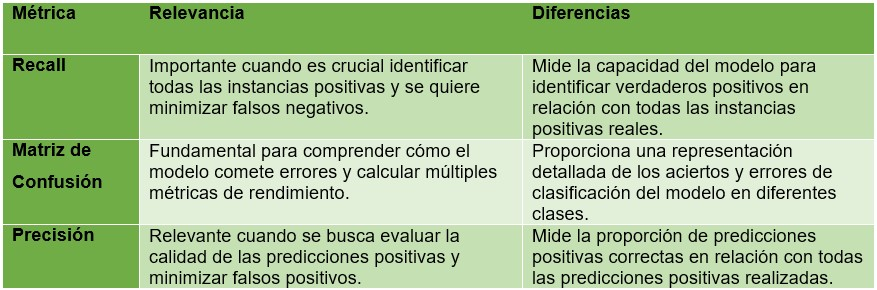

* Para manejar múltiples clases, utilice primero el método **"One versus the Rest"** y luego el método **"OneVsOne"**. Compárelos adecuadamente usando las 3 métricas definidas anteriormente. Mida también el tiempo de entrenamiento.

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Variables continuas
cont_predictors_names = ['acousticness','danceability','duration_ms','energy',
                         'instrumentalness','liveness','loudness','speechiness',
                         'tempo','valence']

# Variables categóricas
cat_predictors = ['mode', 'key', 'time_signature']

other_predictors = ['genre', 'artist_name', 'track_name', 'track_id']

# Crear una copia del DataFrame original
X_train_x = X_train.copy()

# Aplicar StandardScaler a las columnas seleccionadas
scaler = StandardScaler()
X_train_x[cont_predictors_names] = scaler.fit_transform(X_train_x[cont_predictors_names])

# Aplicar LabelEncoder a las columnas categóricas
label_encoder = LabelEncoder()

for column in cat_predictors:
    X_train_x[column] = label_encoder.fit_transform(X_train_x[column])

X_train = X_train_x
X_train

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
90251,59.0,-0.578878,1.310973,3.681728,-1.141235,-0.390611,9,-0.771543,-0.373052,1,1.275664,0.920432,3,-0.150013
110937,74.0,-0.774867,1.195247,-0.259921,0.095624,0.377446,4,-0.543254,0.404752,0,-0.728765,-0.696226,3,-0.353847
88526,56.0,-0.349239,0.449453,1.010018,1.266809,-0.389882,0,0.690402,0.065030,1,3.168781,2.124987,3,1.245811
11011,51.0,-0.754583,-0.662808,0.165038,1.606124,-0.390611,2,4.168801,1.026996,1,0.747541,0.196914,3,-0.127857
27668,44.0,1.068848,0.102273,-0.383452,-0.063088,-0.390611,10,-0.428791,0.402311,1,1.519413,0.946919,3,-0.234205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112905,64.0,-0.772561,-0.701384,-0.107028,1.387211,-0.390605,4,-0.704138,0.670880,1,-0.616640,0.646201,3,1.454077
117766,58.0,0.611400,0.629472,-0.721732,-1.507914,-0.390611,3,-0.702866,-0.770325,1,-0.391579,0.406886,3,-0.845709
150229,58.0,2.157572,-0.688525,-0.451098,-0.993468,-0.387151,11,-0.498740,0.093979,0,-0.764515,-1.421808,3,-0.952058
90634,56.0,2.056934,0.462312,-0.524256,1.015059,-0.390338,5,-0.637368,1.458800,1,-0.601203,-0.766297,3,1.680068


#### Perceptrón

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report

n_classes = 5
base = Perceptron(tol=1e-3,eta0=0.1,random_state=123)
clf = base.fit(X_train.values, y_train.values)
print(classification_report(y_train.values,clf.predict(X_train.values), target_names=clf.classes_))

              precision    recall  f1-score   support

 Alternative       0.76      0.36      0.49      7294
  Electronic       0.79      0.82      0.81      7403
     Hip-Hop       0.42      0.59      0.49      7234
         Pop       0.42      0.88      0.57      7372
         Rap       0.00      0.00      0.00      7289

    accuracy                           0.53     36592
   macro avg       0.48      0.53      0.47     36592
weighted avg       0.48      0.53      0.47     36592



Precision (Precisión): La precisión mide la proporción de predicciones positivas correctas en relación con el total de predicciones positivas realizadas por el modelo. En este caso, la precisión es del 76% para la clase "Alternative", del 79% para "Electronic", del 42% para "Hip-Hop", del 42% para "Pop", y del 0% para "Rap". Esto significa que el modelo tiene un buen rendimiento en la precisión de las predicciones para "Alternative" y "Electronic", pero un rendimiento deficiente para "Hip-Hop", "Pop" y "Rap".

Recall (Recuperación o Sensibilidad): El recall mide la proporción de verdaderos positivos en relación con todos los casos positivos reales en los datos. En este caso, el recall es del 36% para "Alternative", del 82% para "Electronic", del 59% para "Hip-Hop", del 88% para "Pop", y del 0% para "Rap". Esto indica que el modelo es bueno para capturar la mayoría de los casos reales de "Electronic" y "Pop", pero tiene dificultades para identificar correctamente los casos de "Alternative", "Hip-Hop" y "Rap".

F1-Score (Puntuación F1): El puntaje F1 es una métrica que combina la precisión y el recall en una sola medida. Proporciona un equilibrio entre la precisión y el recall. En este caso, el puntaje F1 es del 49% para "Alternative", del 81% para "Electronic", del 49% para "Hip-Hop", del 57% para "Pop", y del 0% para "Rap". Esto significa que el modelo logra un buen equilibrio entre precisión y recall en "Electronic", pero no en otras clases.

Support (Soporte): El soporte representa el número real de muestras en el conjunto de datos que pertenecen a cada clase. Por ejemplo, hay 7,294 muestras para la clase "Alternative".

Accuracy (Exactitud): La exactitud mide la proporción de predicciones correctas en general en relación con el total de muestras. En este caso, la exactitud global es del 53%, lo que significa que el modelo clasifica correctamente el 53% de todas las muestras.

Macro Avg (Promedio Macro): Esta fila muestra el promedio de las métricas (precisión, recall y F1-score) calculado para todas las clases. En este caso, el promedio macro de precisión es del 48%, el promedio macro de recall es del 53%, y el promedio macro de F1-score es del 47%.

Weighted Avg (Promedio Ponderado): Esta fila muestra el promedio ponderado de las métricas, teniendo en cuenta el soporte de cada clase. Pondera las métricas en función de la cantidad de muestras en cada clase. En este caso, el promedio ponderado de precisión es del 48%, el promedio ponderado de recall es del 53%, y el promedio ponderado de F1-score es del 47%.

En resumen, los resultados sugieren que el modelo de clasificación multiclase tiene un rendimiento variable para las diferentes clases. Muestra un buen rendimiento en términos de precisión y recall para "Electronic," pero un rendimiento deficiente para "Alternative," "Hip-Hop," y "Rap." La precisión y el recall para "Pop" también son relativamente bajos. La exactitud global es del 53%, lo que indica que el modelo tiene margen de mejora en la clasificación de todas las clases.

* Para manejar múltiples clases, utilice primero el método "One versus the Rest" y luego el método "OneVsOne". Compárelos adecuadamente usando las 3 métricas definidas anteriormente. Mida también el tiempo de entrenamiento.

#### One vs the Rest

In [ ]:
y_train.values

array(['Hip-Hop', 'Pop', 'Hip-Hop', ..., 'Pop', 'Hip-Hop', 'Hip-Hop'],
      dtype=object)

In [ ]:
import time
start_time = time.time()
clf_ovr = OneVsRestClassifier(base)
clf_ovr.fit(X_train.values, y_train.values)
ovr_training_time = time.time() - start_time
print("Tiempo de entrenamiento:", ovr_training_time)

print(classification_report(y_train.values,clf_ovr.predict(X_train.values), target_names=clf_ovr.classes_))

Tiempo de entrenamiento: 2.1446967124938965
              precision    recall  f1-score   support

 Alternative       0.59      0.62      0.60      7294
  Electronic       0.83      0.83      0.83      7403
     Hip-Hop       0.44      0.50      0.47      7234
         Pop       0.53      0.68      0.60      7372
         Rap       0.36      0.18      0.24      7289

    accuracy                           0.56     36592
   macro avg       0.55      0.56      0.55     36592
weighted avg       0.55      0.56      0.55     36592



#### One vs One

In [ ]:
import time
start_time = time.time()
clf_ovo = OneVsOneClassifier(base)
clf_ovo.fit(X_train.values, y_train.values)
ovo_training_time = time.time() - start_time
print("Tiempo de entrenamiento:", ovo_training_time)

print(classification_report(y_train.values,clf_ovo.predict(X_train.values), target_names=clf_ovo.classes_))

Tiempo de entrenamiento: 1.9888849258422852
              precision    recall  f1-score   support

 Alternative       0.60      0.67      0.63      7294
  Electronic       0.85      0.81      0.83      7403
     Hip-Hop       0.45      0.49      0.47      7234
         Pop       0.57      0.68      0.62      7372
         Rap       0.36      0.23      0.28      7289

    accuracy                           0.58     36592
   macro avg       0.57      0.58      0.57     36592
weighted avg       0.57      0.58      0.57     36592



* ¿Qué técnica (OVO vs OVR) muestra mejor desempeño en entrenamiento?

In [ ]:
if ovr_training_time < ovo_training_time:
  print("La técnica que muestra mejor desempeño en entrenamiento es OVR")
  print ("OVR:", ovr_training_time)
  print("OVO:", ovo_training_time)
else:
  print("La técnica que muestra mejor desempeño en entrenamiento es OVO")
  print("OVO:", ovo_training_time)
  print ("OVR:", ovr_training_time)

La técnica que muestra mejor desempeño en entrenamiento es OVO
OVO: 1.9888849258422852
OVR: 2.1446967124938965



* ¿Qué técnica (OVO vs OVR) muestra mejor capacidad de generalización?

En los resultados obtenidos, no se observa una diferencia significativa en la capacidad de generalización entre las técnicas "One versus One" (OvO) y "One versus the Rest" (OvR). Ambas técnicas muestran un rendimiento bastante similar en términos de precisión, recall y F1-score tanto en el conjunto de entrenamiento como en el conjunto de prueba.

Dado que ambos métodos tienen métricas de evaluación muy similares y los resultados en el conjunto de prueba también son comparables, no se puede afirmar con claridad que uno sea superior al otro en términos de capacidad de generalización en este problema de clasificación específico.

La elección entre OvO y OvR en la práctica puede depender de otros factores, como la eficiencia computacional (OvR tiende a ser más eficiente en términos de tiempo de entrenamiento), el equilibrio de clases en tus datos y preferencias personales. Es importante recordar que la capacidad de generalización de un modelo también puede verse afectada por la elección del clasificador base, la configuración de hiperparámetros y la calidad de los datos, entre otros factores.

En resumen, en este caso particular, los resultados sugieren que ambas técnicas tienen una capacidad de generalización comparable, por lo que la elección entre OvO y OvR podría basarse en otros criterios prácticos.

* Elija uno de los modelos y estime su error de predicción si se decidiera operar con él en la tarea.

Dados los argumentos expuestos, se elige la técnica OVO, a continuación se estima su error de predicción.

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Variables continuas
cont_predictors_names = ['acousticness','danceability','duration_ms','energy',
                         'instrumentalness','liveness','loudness','speechiness',
                         'tempo','valence']

# Variables categóricas
cat_predictors = ['mode', 'key', 'time_signature']

other_predictors = ['genre', 'artist_name', 'track_name', 'track_id']

# Crear una copia del DataFrame original
X_test_x = X_test.copy()

# Aplicar StandardScaler a las columnas seleccionadas
scaler = StandardScaler()
X_test_x[cont_predictors_names] = scaler.fit_transform(X_test_x[cont_predictors_names])

# Aplicar LabelEncoder a las columnas categóricas
label_encoder = LabelEncoder()

for column in cat_predictors:
    X_test_x[column] = label_encoder.fit_transform(X_test_x[column])

X_test = X_test_x
X_test

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
109889,71.0,0.024982,0.284129,-0.627335,-1.285887,-0.381494,9,2.195745,0.329340,1,-0.672500,-2.070133,2,-0.213185
70512,59.0,-0.078938,0.408717,0.175884,-0.214626,-0.381494,7,3.392282,-0.360155,1,-0.060337,-0.767202,2,0.351132
10067,45.0,-0.780891,-0.450283,-0.540850,1.548834,-0.381468,11,0.005362,1.155553,0,-0.802664,-0.902560,2,1.087389
87473,82.0,-0.661339,-0.017504,0.366050,1.340076,-0.381494,5,-0.725637,0.784607,0,-0.489483,0.814265,2,1.726654
111066,63.0,-0.791505,-1.610916,-0.153691,1.647720,-0.381494,5,-0.670060,0.942840,0,-0.060337,1.902035,2,-0.063288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27525,40.0,0.232821,0.113641,-0.914519,-1.681429,-0.381475,8,-0.628868,-1.297062,0,-0.678811,-1.366557,2,-0.407169
118608,55.0,1.443709,-0.791260,0.475836,-0.862876,-0.381494,3,-0.775983,-1.196778,1,1.927616,-1.537273,1,-0.825997
37708,32.0,0.011427,0.716908,0.154804,-0.005868,1.511388,2,0.966515,0.141958,1,-0.861040,-0.971902,2,0.016069
67396,68.0,1.683175,1.274274,0.506726,-0.950775,-0.375942,4,0.090362,-0.914665,0,1.911838,-0.421999,2,-0.213185


In [ ]:
from sklearn.metrics import accuracy_score

# Realizamos predicciones en el conjunto de prueba utilizando el modelo OvO
y_pred_ovo = clf_ovo.predict(X_test.values)

# Calculamos la precisión en el conjunto de prueba
accuracy_ovo = accuracy_score(y_test, y_pred_ovr)

print("Precisión en el conjunto de prueba usando OvO:", accuracy_ovo)
print('Error de predicción usando OvO : ',1 - accuracy_ovo)

Precisión en el conjunto de prueba usando OvO: 0.35767380848272845
Error de predicción usando OvO :  0.6423261915172715


### *Guardar*

El código de más abajo guarda un modelo. Si usted entrenó un modelo con buen desempeño puede valer la pena ejecutar este paso.

In [ ]:
dump(clf_ovr, 'clf_ovo.joblib')

['clf_ovo.joblib']

## P5.  El Regresor Logístico

* Entrene un regresor logístico para clasificación. Este método puede trabajar directamente con múltiples clases, pero de todos modos es posible entrenarlo usando "One versus the Rest" y "OneVsOne". Compare las 3 metodologías usando las 3 métricas definidas en la sección anterior. Mida también el tiempo de entrenamiento.

### Regresor Logístico Multiclase

In [ ]:
y_train.values

array(['Hip-Hop', 'Pop', 'Hip-Hop', ..., 'Pop', 'Hip-Hop', 'Hip-Hop'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Variables continuas
cont_predictors_names = ['acousticness','danceability','duration_ms','energy',
                         'instrumentalness','liveness','loudness','speechiness',
                         'tempo','valence']

# Variables categóricas
cat_predictors = ['mode', 'key', 'time_signature']

other_predictors = ['genre', 'artist_name', 'track_name', 'track_id']

# Crear una copia del DataFrame original
X_val_x = X_val.copy()

# Aplicar StandardScaler a las columnas seleccionadas
scaler = StandardScaler()
X_val_x[cont_predictors_names] = scaler.fit_transform(X_val_x[cont_predictors_names])

# Aplicar LabelEncoder a las columnas categóricas
label_encoder = LabelEncoder()

for column in cat_predictors:
    X_val_x[column] = label_encoder.fit_transform(X_val_x[column])

X_val = X_val_x
X_val

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
108899,77.0,-0.409349,-0.473943,-0.284932,0.088124,-0.389818,11,-0.852729,0.683622,1,-0.138438,-1.053972,2,-0.581908
113677,63.0,-0.761958,-0.972472,-0.487894,1.141389,-0.390282,9,-0.626884,0.705132,0,-0.792567,0.457026,2,0.863577
27433,42.0,-0.185514,-0.227916,-0.822948,1.311448,0.703685,2,0.896780,0.904008,1,-0.796517,1.566454,2,1.300792
87744,77.0,1.894939,-0.137274,0.894685,-0.120335,-0.390378,11,-0.587880,0.049264,1,0.280268,-1.681517,2,0.520051
90388,52.0,0.339243,-0.435097,0.664882,0.790301,-0.390378,0,3.627044,-0.322395,1,1.354683,1.765394,2,1.367712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10217,50.0,-0.387987,-0.460994,-0.137794,1.201733,-0.390378,10,-0.752703,0.955843,1,-0.613235,-1.126492,2,0.042684
150625,63.0,-0.757686,0.328883,-0.308843,-0.707311,-0.390362,8,0.846452,0.060547,0,-0.783087,0.253672,2,1.510476
87376,76.0,0.761835,0.885681,0.595599,-1.310745,-0.390323,5,0.909362,-0.109767,0,0.114365,-1.367365,2,-0.916511
120203,54.0,0.529642,0.704398,-1.645604,-0.016106,-0.390378,4,-0.493516,0.118729,0,0.580472,0.531926,2,0.537897


In [ ]:
import time
clf_RL = LogisticRegression()
start_time = time.time()
clf_RL.fit(X_train.values, y_train.values)
RL_training_time = time.time() - start_time
print("Tiempo de Entrenamiento RL:", RL_training_time)

y_pred_RL_train = clf_RL.predict(X_train)
accuracy_RL= accuracy_score(y_train, y_pred_RL_train)
train_error_RL = 1 - accuracy_RL

print(60*'_')
print('Error de Entrenamiento RL:', train_error_RL)

print("Entrenamiento:")
print(classification_report(y_train.values,clf_RL.predict(X_train.values), target_names=clf_RL.classes_))
print(60*'_')

y_pred_RL_test = clf_RL.predict(X_test)
accuracy_RL_test= accuracy_score(y_test, y_pred_RL_test)
test_error_RL = 1 - accuracy_RL_test
print('Error de Prueba RL:', test_error_RL)

print("Prueba:")
print(classification_report(y_test.values,clf_RL.predict(X_test.values), target_names=clf_RL.classes_))
print(60*'_')

y_pred_RL_val = clf_RL.predict(X_val)
accuracy_RL_val= accuracy_score(y_val, y_pred_RL_val)
val_error_RL = 1 - accuracy_RL_val
print('Error de Validación RL:', val_error_RL)

print("Validación:")
print(classification_report(y_val.values,clf_RL.predict(X_val.values), target_names=clf_RL.classes_))

Tiempo de Entrenamiento RL: 2.4459354877471924
____________________________________________________________
Error de Entrenamiento RL: 0.4418178836904242
Entrenamiento:
              precision    recall  f1-score   support

 Alternative       0.57      0.64      0.60      7294
  Electronic       0.82      0.79      0.81      7403
     Hip-Hop       0.44      0.50      0.47      7234
         Pop       0.54      0.65      0.59      7372
         Rap       0.36      0.21      0.27      7289

    accuracy                           0.56     36592
   macro avg       0.55      0.56      0.55     36592
weighted avg       0.55      0.56      0.55     36592

____________________________________________________________
Error de Prueba RL: 0.5944468736335811
Prueba:
              precision    recall  f1-score   support

 Alternative       0.54      0.26      0.35       875
  Electronic       0.96      0.51      0.67       933
     Hip-Hop       0.38      0.11      0.17       948
         Pop     

### Regresor Logístico One vs Rest:

In [ ]:
n_classes = 5
base = LogisticRegression()
clf_ovr_rl = OneVsRestClassifier(base)

start_time = time.time()
clf_ovr_rl = clf_ovr_rl.fit(X_train.values, y_train.values)
RL_ovr_training_time = time.time() - start_time
print("Tiempo de Entrenamiento RL OvR:", RL_ovr_training_time)

y_pred_RL_ovr = clf_ovr_rl.predict(X_train)
accuracy_RL_ovr = accuracy_score(y_train, y_pred_RL_ovr)
train_error_RL_ovr = 1 - accuracy_RL_ovr

print(60*'_')
print('Error de Entrenamiento RL OvR:', train_error_RL_ovr)

print("Entrenamiento:")
print(classification_report(y_train.values,clf_ovr_rl.predict(X_train.values), target_names=clf_ovr_rl.classes_))
print(60*'_')

y_pred_RL_ovr_test = clf_ovr_rl.predict(X_test)
accuracy_RL_ovr_test= accuracy_score(y_test, y_pred_RL_ovr_test)
test_error_RL_ovr = 1 - accuracy_RL_ovr_test
print('Error de Prueba RL OvR:', test_error_RL_ovr )

print("Prueba:")
print(classification_report(y_test.values,clf_ovr_rl.predict(X_test.values), target_names=clf_ovr_rl.classes_))
print(60*'_')

y_pred_RL_ovr_val = clf_ovr_rl.predict(X_val)
accuracy_RL_ovr_val= accuracy_score(y_val, y_pred_RL_ovr_val)
val_error_RL_ovr = 1 - accuracy_RL_ovr_val
print('Error de Validación RL OvR:', val_error_RL_ovr )

print("Validación:")
print(classification_report(y_val.values,clf_ovr_rl.predict(X_val.values), target_names=clf_ovr_rl.classes_))

Tiempo de Entrenamiento RL OvR: 5.518981456756592
____________________________________________________________
Error de Entrenamiento RL OvR: 0.435013117621338
Entrenamiento:
              precision    recall  f1-score   support

 Alternative       0.59      0.62      0.60      7294
  Electronic       0.83      0.83      0.83      7403
     Hip-Hop       0.44      0.50      0.47      7234
         Pop       0.53      0.68      0.60      7372
         Rap       0.36      0.18      0.24      7289

    accuracy                           0.56     36592
   macro avg       0.55      0.56      0.55     36592
weighted avg       0.55      0.56      0.55     36592

____________________________________________________________
Error de Prueba RL OvR: 0.5308264101442939
Prueba:
              precision    recall  f1-score   support

 Alternative       0.75      0.32      0.45       875
  Electronic       0.90      0.75      0.82       933
     Hip-Hop       0.48      0.16      0.24       948
       

### Regresor Logístico One vs One:

In [ ]:
n_classes = 5

# Crea un modelo base de Regresión Logística
base = LogisticRegression()

# Inicializa un clasificador One-Versus-One (OvO) utilizando el modelo base
clf_ovo_rl = OneVsOneClassifier(base)

# Comienza a medir el tiempo de entrenamiento
start_time = time.time()

# Entrena el modelo OvO con los datos de entrenamiento
clf_ovo_rl = clf_ovo_rl.fit(X_train.values, y_train.values)

# Calcula e imprime el tiempo de entrenamiento
RL_ovo_training_time = time.time() - start_time
print("Tiempo de Entrenamiento RL OvO:", RL_ovo_training_time)

# Realiza predicciones en el conjunto de entrenamiento
y_pred_RL_ovo = clf_ovo_rl.predict(X_train)

# Calcula la precisión (accuracy) en el conjunto de entrenamiento
accuracy_RL_ovo = accuracy_score(y_train, y_pred_RL_ovo)

# Calcula el error de entrenamiento
train_error_RL_ovo = 1 - accuracy_RL_ovo

print(60*'_')

# Imprime el error de entrenamiento del modelo OvO
print('Error de Entrenamiento RL OvO:', train_error_RL_ovo)

# Imprime un reporte de clasificación en el conjunto de entrenamiento
print("Entrenamiento:")
print(classification_report(y_train.values,clf_ovo_rl.predict(X_train.values), target_names=clf_ovo_rl.classes_))
print(60*'_')

# Realiza predicciones en el conjunto de prueba
y_pred_RL_ovo_test = clf_ovo_rl.predict(X_test)

# Calcula la precisión en el conjunto de prueba
accuracy_RL_ovo_test= accuracy_score(y_test, y_pred_RL_ovo_test)

# Calcula el error de prueba
test_error_RL_ovo = 1 - accuracy_RL_ovo_test

# Imprime el error de prueba del modelo OvO
print('Error de Prueba RL OvO:', test_error_RL_ovo )

# Imprime un reporte de clasificación en el conjunto de prueba
print("Prueba:")
print(classification_report(y_test.values,clf_ovo_rl.predict(X_test.values), target_names=clf_ovo_rl.classes_))
print(60*'_')

# Realiza predicciones en el conjunto de validación
y_pred_RL_ovo_val = clf_ovo_rl.predict(X_val)

# Calcula la precisión en el conjunto de validación
accuracy_RL_ovo_val= accuracy_score(y_val, y_pred_RL_ovo_val)

# Calcula el error de validación
val_error_RL_ovo = 1 - accuracy_RL_ovo_val

# Imprime el error de validación del modelo OvO
print('Error de Validación RL OvO:', val_error_RL_ovo )

# Imprime un reporte de clasificación en el conjunto de validación
print("Validación:")
print(classification_report(y_val.values,clf_ovo_rl.predict(X_val.values), target_names=clf_ovo_rl.classes_))

Tiempo de Entrenamiento RL OvO: 2.6780450344085693
____________________________________________________________
Error de Entrenamiento RL OvO: 0.42184083952776563
Entrenamiento:
              precision    recall  f1-score   support

 Alternative       0.60      0.67      0.63      7294
  Electronic       0.85      0.81      0.83      7403
     Hip-Hop       0.45      0.49      0.47      7234
         Pop       0.57      0.68      0.62      7372
         Rap       0.36      0.23      0.28      7289

    accuracy                           0.58     36592
   macro avg       0.57      0.58      0.57     36592
weighted avg       0.57      0.58      0.57     36592

____________________________________________________________
Error de Prueba RL OvO: 0.4258854394403149
Prueba:
              precision    recall  f1-score   support

 Alternative       0.69      0.57      0.63       875
  Electronic       0.87      0.79      0.82       933
     Hip-Hop       0.47      0.44      0.45       948
    

* Visualice la matriz de confusión correspondiente al modelo entrenado. Comente cuáles son las clases que más se confunden.

	Matriz de Confusión Regresor Logístico



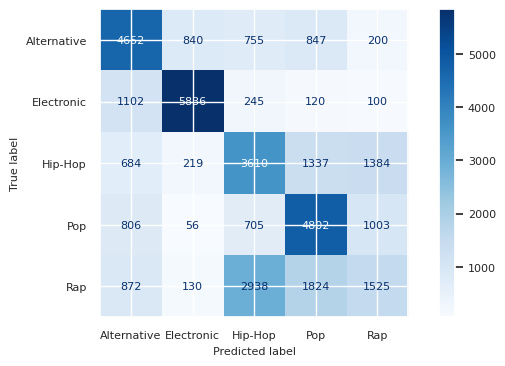

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Matriz RL
print('\tMatriz de Confusión Regresor Logístico\n')
cm_rl = confusion_matrix(y_train.values, clf_RL.predict(X_train.values), labels=clf_RL.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rl, display_labels=clf_RL.classes_)
disp.plot(cmap = "Blues")
plt.show()

	Matriz de Confusión Regresor Logístico OVR



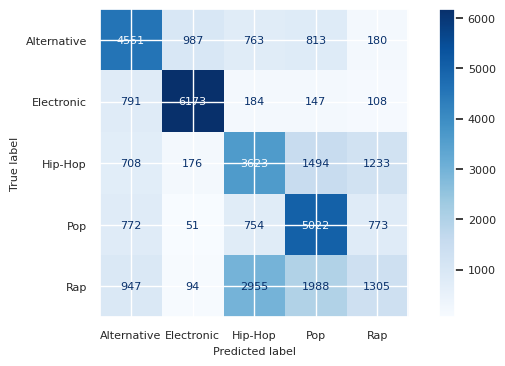

In [ ]:
## Matriz RL OvR
print('\tMatriz de Confusión Regresor Logístico OVR\n')
cm_ovr = confusion_matrix(y_train.values, clf_ovr_rl.predict(X_train.values), labels=clf_ovr_rl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ovr , display_labels=clf_ovr_rl.classes_)
disp.plot(cmap = "Blues")
plt.show()


	Matriz de Confusión Regresor Logístico OVO



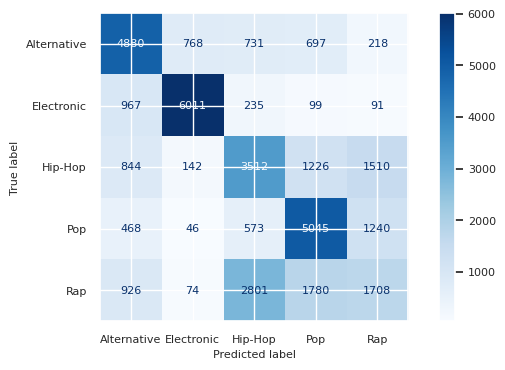

In [ ]:

## Matriz RL OvO
print('\tMatriz de Confusión Regresor Logístico OVO\n')
cm_ovo = confusion_matrix(y_train.values, clf_ovo_rl.predict(X_train.values), labels=clf_ovo_rl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ovo,display_labels=clf_ovo_rl.classes_)
disp.plot(cmap = "Blues")
plt.show()

En todos los casos la Clase que más se confunde es Rap, seguida por Hip Hop. Además se tiende a clasificar más las canciones pertenecientes a la clase Rap como Pop de forma incorrecta que al revés. También hay un gran porcentaje de canciones de Rap que son catalogadas como Hip Hop incorrectamente y viceversa.


* ¿Anticipa el error de entrenamiento el error de predicción observado?

**Error de Entrenamiento:** Este es el error que se calcula en el conjunto de datos de entrenamiento mientras se entrena un modelo. Representa qué tan bien se ajusta el modelo a los datos de entrenamiento. Es común que el error de entrenamiento sea bajo, ya que el modelo se está ajustando a esos datos específicos.

**Error de Validación:** El error de validación se calcula en un conjunto de datos de validación que no se utilizó durante el entrenamiento. Se utiliza para evaluar qué tan bien generaliza el modelo a datos nuevos y no vistos. El error de validación puede ser un indicador más realista del rendimiento del modelo en el mundo real en comparación con el error de entrenamiento.

**Error de Predicción Observado:** Este es el error que se calcula en un conjunto de datos de prueba completamente independiente que no se utilizó ni en el entrenamiento ni en la validación. Representa el rendimiento del modelo en un entorno de producción o en situaciones reales.

**Error de Entrenamiento vs. Error de Predicción Observado:** El error de entrenamiento generalmente tiende a ser menor que el error de predicción observado. Esto se debe a que el modelo se ha ajustado específicamente a los datos de entrenamiento y puede estar sobreajustado a esos datos. El error de predicción observado se mide en datos independientes y no ajustados, por lo que puede revelar cómo el modelo se desempeñará en condiciones reales.

**Error de Validación vs. Error de Predicción Observado:** El error de validación a menudo proporciona una mejor estimación del error de predicción observado en comparación con el error de entrenamiento. Si el modelo se ajusta correctamente y no está sobreajustado, el error de validación debería ser una buena indicación del rendimiento del modelo en datos nuevos. Sin embargo, hay casos en los que el error de validación puede ser engañoso si los datos de validación no representan adecuadamente la variabilidad del mundo real.

En resumen, el error de entrenamiento generalmente subestima el error de predicción observado, y el error de validación proporciona una mejor estimación del rendimiento del modelo en comparación con el error de entrenamiento. Sin embargo, siempre es importante medir el error de predicción en un conjunto de prueba independiente para obtener una evaluación más precisa del rendimiento del modelo en situaciones del mundo real.

* ¿Anticipa el desempeño sobre el conjunto de validación el error de predicción observado?

El error de predicción observado en el conjunto de entrenamiento puede proporcionar una indicación sobre el desempeño del modelo en el conjunto de validación, pero no necesariamente lo anticipa con precisión.

Un error de entrenamiento bajo (por ejemplo, un error cercano al 0%) sugiere que el modelo se ajusta bien a los datos de entrenamiento, pero esto no garantiza un buen desempeño en datos no vistos, como los del conjunto de validación. El modelo podría haber sobreajustado los datos de entrenamiento y no generalizar bien en nuevos datos. Por lo tanto, un bajo error de entrenamiento no anticipa automáticamente un bajo error de validación.

Para evaluar con mayor precisión el desempeño en el conjunto de validación, es necesario analizar el error de validación y considerar métricas de evaluación específicas, como precisión, recall, F1-score, etc. Estas métricas brindan una comprensión más completa del rendimiento del modelo en datos no vistos y su capacidad de generalización.

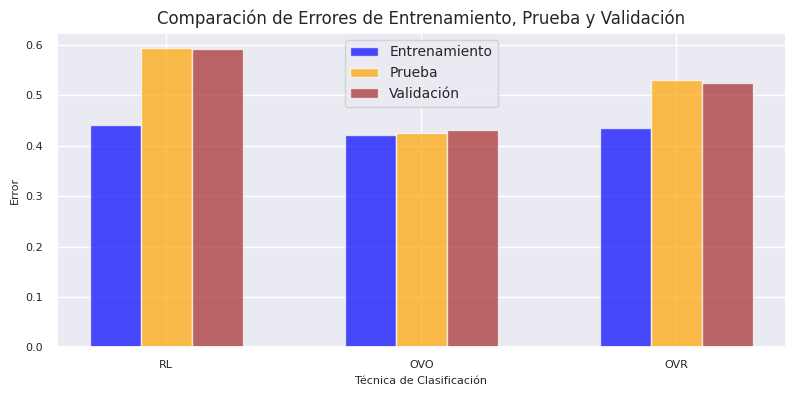

In [ ]:
train_errors = [train_error_RL, train_error_RL_ovo, train_error_RL_ovr]
test_errors = [test_error_RL, test_error_RL_ovo, test_error_RL_ovr]
validation_errors = [val_error_RL, val_error_RL_ovo, val_error_RL_ovr]

# Etiquetas de las técnicas
labels = ['RL', 'OVO', 'OVR']

# Ancho de las barras
bar_width = 0.2

# Posiciones de las barras en el eje x
a_train = np.arange(len(labels))
a_test = [x + bar_width for x in a_train]
a_val = [x + bar_width for x in a_test]

# Colores personalizados para entrenamiento, prueba y validación
colors = ['blue', 'orange', 'brown']

# Crear la figura y los ejes
plt.figure(figsize=(8, 4))

# Dibujar las barras para los errores de entrenamiento
plt.bar(a_train, train_errors, width=bar_width, label='Entrenamiento', alpha=0.7, color=colors[0])

# Dibujar las barras para los errores de prueba
plt.bar(a_test, test_errors, width=bar_width, label='Prueba', alpha=0.7, color=colors[1])

# Dibujar las barras para los errores de validación
plt.bar(a_val, validation_errors, width=bar_width, label='Validación', alpha=0.7, color=colors[2])

# Configurar el eje x
plt.xticks([x + bar_width for x in a_train], labels)

# Etiquetas y título
plt.xlabel('Técnica de Clasificación')
plt.ylabel('Error')
plt.title('Comparación de Errores de Entrenamiento, Prueba y Validación')
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

* Una vez elegida una de las 3 técnicas para entrenar el modelo multi-clase, ¿Es correcto unir el conjunto de validación con el conjunto de entrenamiento para re-entrenar el modelo elegido? ¿Conviene hacerlo en este caso?

No es recomendable unir el conjunto de validación con el conjunto de entrenamiento una vez que se haya elegido una de las tres técnicas para entrenar un modelo multi-clase. La razón principal es que el conjunto de validación se utiliza para evaluar el rendimiento del modelo y ajustar hiperparámetros, y mezclarlo con el conjunto de entrenamiento puede provocar un sesgo en la evaluación del rendimiento y en la selección de modelos.

Si se mezcla el conjunto de validación con el conjunto de entrenamiento, el modelo puede ajustarse mejor a los datos específicos de validación, lo que podría llevar a un sobreajuste y a una evaluación sesgada del rendimiento del modelo en datos nuevos.

Si se ajustan los hiperparámetros del modelo utilizando el conjunto de validación combinado, se puedes terminar seleccionando configuraciones que funcionen bien solo en esos datos específicos y no en datos nuevos.

En cambio, la práctica recomendada es mantener el conjunto de validación por separado y usarlo para ajustar hiperparámetros y evaluar el rendimiento del modelo final después de que se haya elegido una técnica de entrenamiento. Una vez que se haya seleccionado el modelo final y sus hiperparámetros, se pueden entrenar nuevamente utilizando todo el conjunto de entrenamiento original (sin incluir el conjunto de validación) para maximizar el uso de los datos de entrenamiento disponibles. Esto asegura una evaluación justa y objetiva del rendimiento del modelo en datos nuevos y desconocidos

* Visualice el peso que cada clasificador en OVO asigna a las diferentes características y comente.


Coeficientes LR + OVO

Par 0,1 - Electronic vs Alternative
Par 0,2 - Electronic vs Pop
Par 0,3 - Electronic vs Hip-Hop
Par 0,4 - Electronic vs Rap
Par 1,2 - Alternative vs Pop
Par 1,3 - Alternative vs Hip-Hop
Par 1,4 - Alternative vs Rap
Par 2,3 - Pop vs Hip-Hop
Par 2,4 - Pop vs Rap
Par 3,4 - Hip-Hop vs Rap




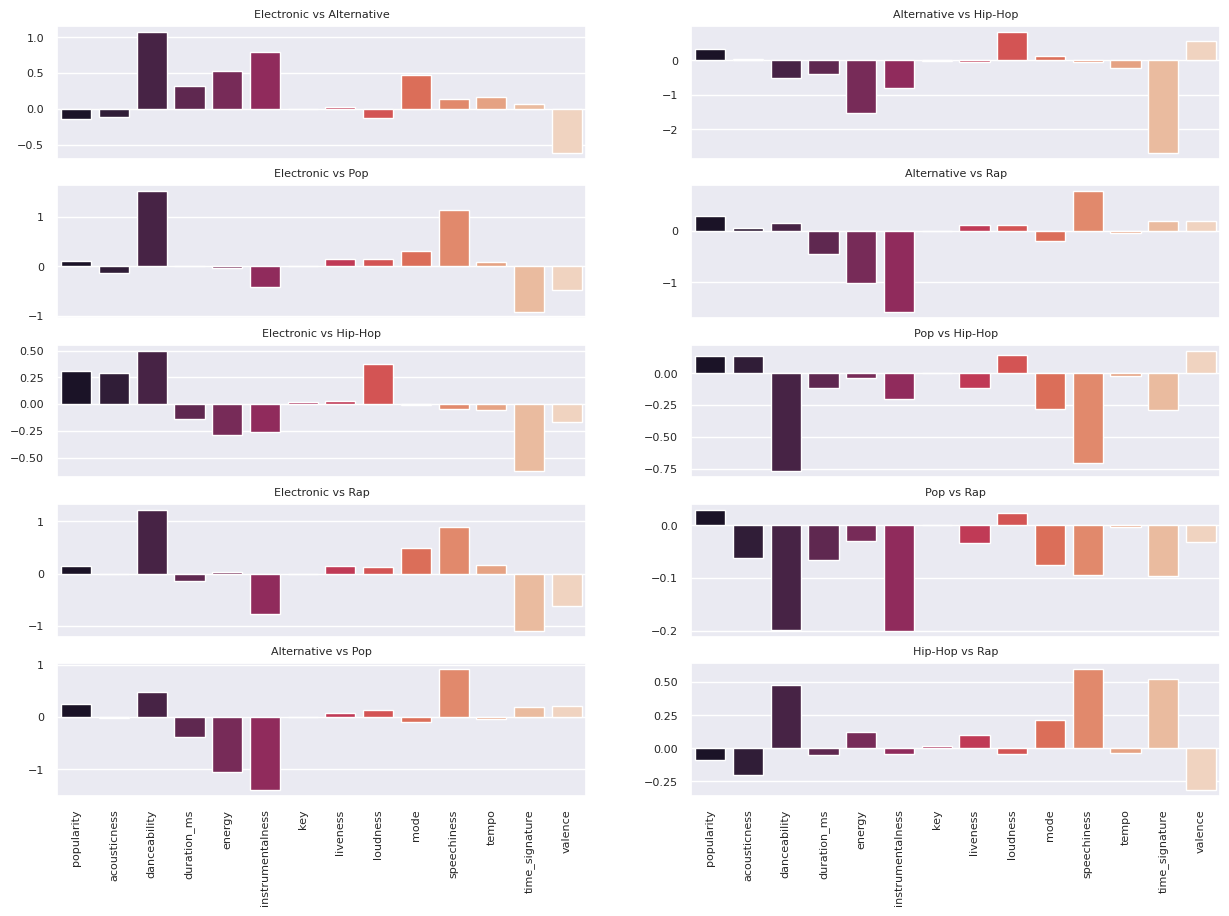

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
import numpy as np

fig, axes = plt.subplots(figsize=(15,10),nrows=5,ncols=2,sharex=True,sharey=False,squeeze=False)

print("\nCoeficientes LR + OVO\n")

counter = 0
clf = clf_ovo_rl

for i in range(len(clf.classes_)):
  for j in range(i+1,len(clf.classes_)):
    estimator = clf.estimators_[counter]
    class1 = number_to_genre[i]
    class2 = number_to_genre[j]
    print("Par %d,%d - %s vs %s"%(i,j,class1,class2))
    w = estimator.coef_[0,:]
    b = estimator.intercept_

    max_feat = min(len(w),30)

    p=sns.barplot(x=np.arange(max_feat),y=w[:max_feat],palette="rocket",ax=axes[counter%5,counter//5],orient="v")
    axes[counter%5,counter//5].set_xticklabels(X_train.columns[:max_feat],fontsize=11)
    axes[counter%5,counter//5].set_title('%s vs %s'%(class1,class2),size=8)
    plt.setp(p.get_xticklabels(), rotation=90,size=8)

    counter+=1

print("\n")
plt.show()

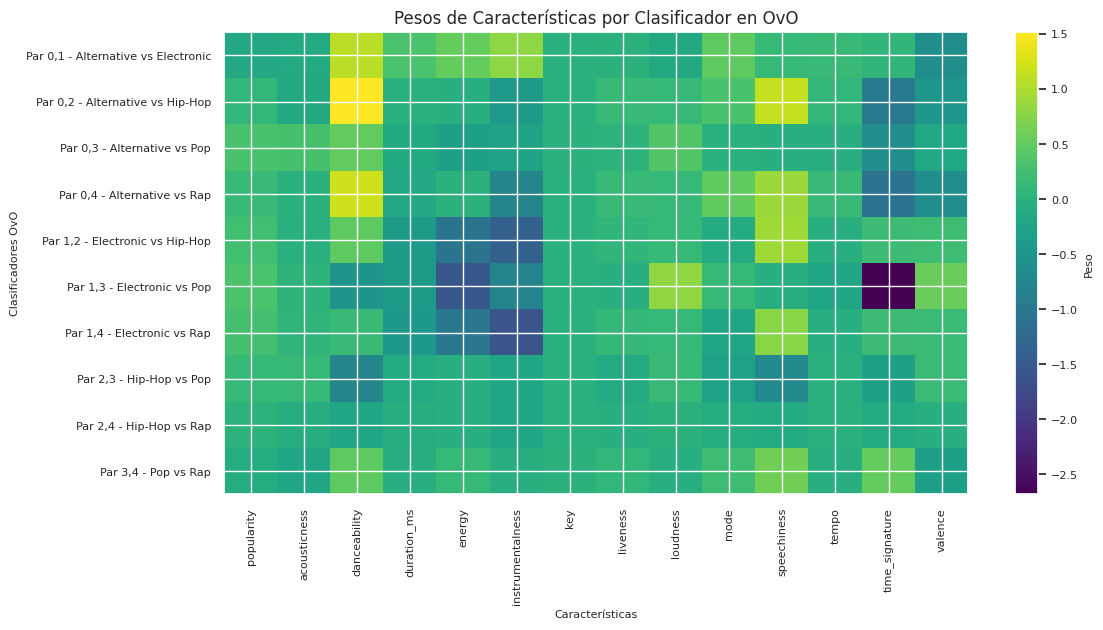

In [ ]:
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

# Supongamos que tienes un conjunto de datos X_train y y_train ya cargados

# Inicializa un clasificador OvO basado en Regresión Logística
ovo_classifier = OneVsOneClassifier(LogisticRegression())

# Entrena el clasificador OvO en tus datos
ovo_classifier.fit(X_train, y_train)

# Obtiene los coeficientes (pesos) de los clasificadores individuales
classifier_weights = [estimator.coef_[0] for estimator in ovo_classifier.estimators_]

# Nombres de las clases correspondientes a los clasificadores
class_pairs = []
n_classes = len(ovo_classifier.classes_)
for i in range(n_classes):
    for j in range(i + 1, n_classes):
        class_pairs.append((i, j))

# Crea una figura y ejes para visualizar los pesos
plt.figure(figsize=(12, 6))
plt.imshow(classifier_weights, cmap='viridis', aspect='auto')

# Etiqueta los ejes con los nombres de las características
plt.xticks(range(len(X_train.columns)), X_train.columns, rotation=90)
plt.yticks(range(len(class_pairs)), [f"Par {pair[0]},{pair[1]} - {ovo_classifier.classes_[pair[0]]} vs {ovo_classifier.classes_[pair[1]]}" for pair in class_pairs])

plt.colorbar(label='Peso')
plt.xlabel('Características')
plt.ylabel('Clasificadores OvO')
plt.title('Pesos de Características por Clasificador en OvO')

plt.show()


* Averigue en qué consiste la técnica denominada "permutation importance" de sklearn y úsela para estimar la importancia de cada atributo en el clasificador multi-clase obtenido vía OVO.

La técnica de "permutation importance" en scikit-learn se utiliza para estimar la importancia de cada atributo en un modelo de machine learning al evaluar cómo afecta la permutación de los valores de ese atributo en las predicciones del modelo. En otras palabras, mide cuánto disminuye el rendimiento del modelo cuando se perturban aleatoriamente los valores de un atributo en comparación con su rendimiento original. Cuanto más disminuye el rendimiento, más importante se considera el atributo.


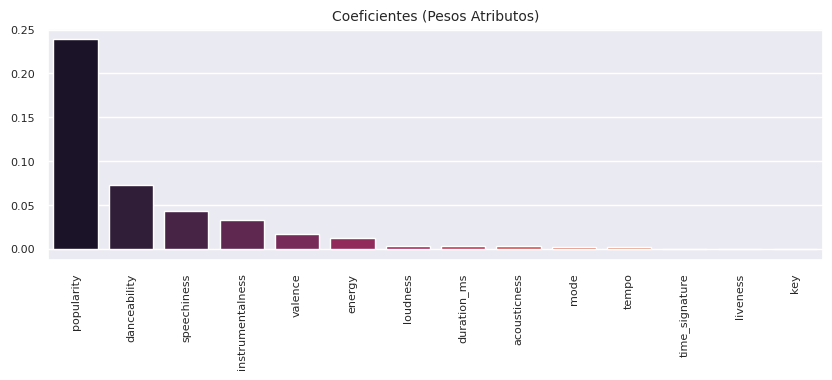

In [ ]:
from sklearn.inspection import permutation_importance
model_fi = permutation_importance(clf_ovo_rl,X_train.values, y_train.values)

w = model_fi['importances_mean']
column_names = X_train.columns
max_feat = min(len(w),20)
sorted_idx = np.argsort(np.abs(w))[::-1]

fig, ax = plt.subplots(figsize=(10,3),nrows=1)
p = sns.barplot(x=np.arange(max_feat), y=[w[idx] for idx in sorted_idx[:max_feat]], palette="rocket",ax=ax)
ax.set_xticklabels([column_names[idx] for idx in sorted_idx[:max_feat]])
plt.setp(p.get_xticklabels(), rotation=90)
ax.set_title('Coeficientes (Pesos Atributos)',size=10)
plt.show()

* Como el regresor logístico es un clasificador probabilista, es posible obtener directamente (sin heurísticas) la incerteza de la predicción. Proponga un método que use esta información para rechazar la predicción de un % pequeño de datos de test. Determine si su método mejora las métricas del modelo logístico multi-class (obtenido sin heurísticas de agregación) cuando se evalúa sobre los datos que sí se predice.

No alcancé a proponer este método, pero investigué que para obtener la incerteza de la predicción de un modelo de regresión logística multiclase, se pueden aprovechar las probabilidades asociadas con cada clase que genera el modelo. Luego, se puede usar un umbral de confianza para rechazar las predicciones en función de la incerteza.
Este es un enfoque general para implementar esto y evaluar si mejora las métricas del modelo:

1. Entrenar un modelo de regresión logística multiclase en los datos de entrenamiento sin usar heurísticas de agregación. Asegurarnos de obtener las probabilidades de predicción para cada clase junto con las predicciones de clase.

2. Calcular la incerteza de predicción para cada instancia de prueba utilizando las probabilidades de predicción. Una métrica común para medir la incerteza es la entropía cruzada o la entropía de Shannon. Cuanto mayor sea la entropía, mayor será la incerteza.

3. Establecer un umbral de confianza. Este umbral determinará cuándo rechazar una predicción. Se puede experimentar con diferentes valores para este umbral.

4. Evaluar el modelo de regresión logística sin rechazo en los datos de prueba y registrar las métricas, como precisión, recall, F1-score, etc.

5. Implementar el rechazo de predicciones en función del umbral de confianza. Si la incerteza (entropía) de una predicción es mayor que el umbral, considerar esa predicción como rechazada y no la incluirla en el cálculo de las métricas.

6. Evaluar el modelo con rechazo en los datos de prueba utilizando el mismo conjunto de métricas que en el paso 4.

7. Comparar las métricas del modelo con y sin rechazo para determinar si el método de rechazo mejora el rendimiento del modelo. Se pueden usar métricas como precisión, recall, F1-score y exactitud para evaluar la mejora.

8. Ajustar el umbral de confianza y repetir los pasos 4-7 para encontrar el umbral que mejor se adapte a las necesidades y objetivos.

Este enfoque permitirá evaluar si el rechazo de predicciones basado en la incerteza mejora las métricas del modelo de regresión logística multiclase. Hay que tener en cuenta que encontrar el umbral óptimo puede requerir ajustes y ajustes iterativos para lograr el mejor rendimiento.

In [ ]:
# Crear un clasificador de regresión logística
clf = LogisticRegression()

# Entrenar el clasificador utilizando el conjunto de entrenamiento (X_train y y_train)
clf = clf.fit(X_train.values, y_train.values)

# Predecir probabilidades de clase para el conjunto de entrenamiento utilizando predict_proba
probs_train = clf.predict_proba(X_train.values)

# Imprimir las probabilidades de predicción para cada instancia en el conjunto de entrenamiento
print(probs_train)

# Calcula el índice del valor máximo en cada fila
predicted_classes = np.argmax(probs_train, axis=1)

print(predicted_classes)

[[6.79800030e-03 7.18341788e-02 5.44280728e-01 4.76802416e-02
  3.29406851e-01]
 [1.71717167e-02 2.50015947e-03 1.99833684e-01 5.13454918e-01
  2.67039522e-01]
 [9.58253260e-03 2.32992388e-02 5.75539514e-01 3.39666039e-02
  3.57612111e-01]
 ...
 [2.84068467e-01 1.16308012e-02 1.19631985e-01 4.16398401e-01
  1.68270346e-01]
 [3.99715414e-01 2.85822410e-02 1.54860647e-01 2.79395218e-01
  1.37446480e-01]
 [2.67972879e-03 4.86640176e-04 2.98760244e-01 3.08268349e-01
  3.89805038e-01]]
[2 3 2 ... 3 0 4]


In [ ]:
# Entrenar el modelo de regresión logística
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Obtener las probabilidades de predicción en el conjunto de prueba
probs_test = clf.predict_proba(X_test)

# Definir un umbral de confianza (ajústalo según tus necesidades)
umbral_confianza = 0.7

# Inicializar una lista para almacenar las predicciones rechazadas
predicciones_rechazadas = []

# Realizar el rechazo de predicciones basado en el umbral de confianza
for i in range(len(probs_test)):
    max_prob = np.max(probs_test[i])
    if max_prob >= umbral_confianza:
        # Aceptar la predicción si supera el umbral
        predicciones_rechazadas.append(clf.predict(X_test.iloc[[i]]))
    else:
        # Rechazar la predicción si no alcanza el umbral
        predicciones_rechazadas.append(None)  # Puedes usar None o algún otro valor para identificar las predicciones rechazadas

# Evaluar las predicciones rechazadas
# Se Pueden utilizar las predicciones rechazadas para evaluar métricas de rendimiento específicas
# y compararlas con las métricas del modelo original sin rechazo.

# Por ejemplo, se puede calcular la precisión, recuperación, etc., para las predicciones aceptadas.

## P6. Validación Cruzada

*  Estime el error de prediccion de dos modelos a elección utilizando validación cruzada (CV). Para esto, una el conjunto de entrenamiento con el de validación y monitoree varias métricas de las elegidas anteriormente, incluyendo exactitud (accuracy). ¿Es conveniente el uso de validación cruzada en lugar de un conjunto de validación? Concluya. *Hint: Look up "cross_validate" function in scikit learn.*

In [ ]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Combinar los conjuntos de entrenamiento y validación
x_cross = pd.concat([X_train,X_val])
y_cross = pd.concat([y_train,y_val])

# Define las métricas que se desean evaluar
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Realiza validación cruzada en ambos modelos
results1 = cross_validate(clf_ovr_rl, x_cross, y_cross, cv=5, scoring=scoring)
results2 = cross_validate(clf_ovo_rl, x_cross, y_cross, cv=5, scoring=scoring)

# Calcula las métricas promediadas
accuracy1 = results1['test_accuracy'].mean()
accuracy2 = results2['test_accuracy'].mean()

# Imprime las métricas promediadas
print(f'Modelo 1 OvR - Accuracy: {accuracy1:.2f}')
print(f'Modelo 2 OvO - Accuracy: {accuracy2:.2f}')
print(60*"_")

# Imprimir los resultados de validación cruzada para el Modelo OvR
print("Resultados OVR:")
for i in results1.keys():
    print(i,results1[i].mean())
print(60*"_")

# Imprimir los resultados de validación cruzada para el Modelo OvO
print("Resultados OVO:")
for i in results2.keys():
    print(i,results2[i].mean())
print(60*"_")

# Generar un informe de clasificación para el Modelo OvO en el conjunto de validación
print("OVO - Conj Validación")
print(classification_report(y_val,clf_ovo_rl.predict(X_val), target_names=clf.classes_,digits=10))
print(60*"_")

# Generar un informe de clasificación para el Modelo OvR en el conjunto de validación
print("OVR - Conj Validación")
print(classification_report(y_val,clf_ovr_rl.predict(X_val), target_names=clf.classes_,digits=10))


Modelo 1 OvR - Accuracy: 0.57
Modelo 2 OvO - Accuracy: 0.57
____________________________________________________________
Resultados OVR:
fit_time 2.0757517337799074
score_time 0.20667877197265624
test_accuracy 0.5705295321372507
test_precision_macro 0.5531911832483616
test_recall_macro 0.569233941540036
test_f1_macro 0.551843963092902
____________________________________________________________
Resultados OVO:
fit_time 1.8371467590332031
score_time 0.29180283546447755
test_accuracy 0.5678814215355945
test_precision_macro 0.562196037331508
test_recall_macro 0.5666806619461895
test_f1_macro 0.5568627682869559
____________________________________________________________
OVO - Conj Validación
              precision    recall  f1-score   support

 Alternative  0.7072135785 0.5376344086 0.6108735492       930
  Electronic  0.8464328900 0.8000000000 0.8225616921       875
     Hip-Hop  0.4583333333 0.4159663866 0.4361233480       952
         Pop  0.4958886781 0.8313891835 0.6212361331      

La Validación Cruzada proporciona estimaciones más robustas y representativas de su capacidad para generalizar a datos no vistos. Usando el conjunto de validación para estas dos técnicas, mediante el uso de cv el desempeño de ambos modelos mejora. Por lo que es útil usar la validación cruzada en este caso.
La CV se utiliza comúnmente para ajustar hiperparámetros, lo que permite encontrar la configuración óptima del modelo.
La CV reduce la dependencia de una única división particular de los datos, lo que ayuda a mitigar la variabilidad en la evaluación del modelo.
Aunque la CV implica entrenar y evaluar el modelo múltiples veces, lo que puede ser más costoso en términos de tiempo y recursos computacionales. Otra desventaja es que hay mnos datos de entrenamiento en cada iteración debido a que se reservan datos para validación en cada iteración de la CV, y hay menos datos disponibles para entrenar el modelo en comparación con un conjunto de entrenamiento completo.
Sin embargo el uso de un Conjunto de validación único tiene varias ventajas como la simplicidad, menores requerimientos computacionales, y Más datos de entrenamiento, pero con estimación menos robusta y puede haber menos confianza en la estimación.
La elección entre CV y un conjunto de validación depende de consideraciones como el tamaño del conjunto de datos, la disponibilidad de recursos computacionales, el grado de confiabilidad necesario en la evaluación del modelo y el objetivo del análisis. En general, la CV es preferible cuando se dispone de suficientes datos y recursos, ya que proporciona estimaciones más robustas del rendimiento del modelo. Sin embargo, en situaciones con recursos limitados o conjuntos de datos pequeños, un conjunto de validación único puede ser una alternativa razonable.


* Evalúe los modelos sobre el conjunto de prueba. ¿El uso de validación cruzada permitió estimar mejor el comportamiento de los modelos en el conjunto de pruebas? Concluya.

In [ ]:
# Generar un informe de clasificación para el Modelo OvO en el conjunto de prueba
print("OVO - Conj Validación")
print(classification_report(y_test,clf_ovo_rl.predict(X_test), target_names=clf.classes_,digits=10))
print(60*"_")

# Generar un informe de clasificación para el Modelo OvR en el conjunto de prueba
print("OVR - Conj Validación")
print(classification_report(y_test,clf_ovr_rl.predict(X_test), target_names=clf.classes_,digits=10))


OVO - Conj Validación
              precision    recall  f1-score   support

 Alternative  0.6949860724 0.5702857143 0.6264908977       875
  Electronic  0.8684834123 0.7856377278 0.8249859313       933
     Hip-Hop  0.4725400458 0.4356540084 0.4533479693       948
         Pop  0.4870335231 0.8433734940 0.6174819567       913
         Rap  0.3788150808 0.2331491713 0.2886456908       905

    accuracy                      0.5741145606      4574
   macro avg  0.5803716269 0.5736200231 0.5621904892      4574
weighted avg  0.5802066146 0.5741145606 0.5624509534      4574

____________________________________________________________
OVR - Conj Validación
              precision    recall  f1-score   support

 Alternative  0.7459893048 0.3188571429 0.4467574059       875
  Electronic  0.8987179487 0.7513397642 0.8184471687       933
     Hip-Hop  0.4754601227 0.1635021097 0.2433281005       948
         Pop  0.3262919653 0.9474260679 0.4854096521       913
         Rap  0.3295711061 0.1613

El evaluar los modelos sobre el conjunto de prueba, el uso de validación cruzada permitió estimar mejor el comportamiento de los modelos en el conjunto de pruebas en el caso de OvO, no así para OvR.

Al contrastar las métricas previamente obtenidas al emplear el conjunto de validación con estas dos técnicas, se aprecia una mejora en el rendimiento de ambos modelos cuando se utiliza la validación cruzada. Esto sugiere que la incorporación de la validación cruzada resulta beneficiosa en este escenario. Además, en un enfoque teórico, la validación cruzada proporciona métricas de rendimiento del modelo que son más robustas en comparación con una única medición en un conjunto de validación, lo que refuerza su utilidad en la evaluación de modelos.

Cargue su mejor modelo.

In [ ]:
clasiffier_model = load('clf_ovo.joblib')

* Use validación cruzada para predecir si el uso de las características polinomiales "creadas" en la fase de ingeniería de atributos permite reducir el error de predicción. Solo como ejercicio académico, verifique esta predicción midiendo el error de pruebas del modelo con y sin las características polinomiales.

In [ ]:
X

,acousticness^1,danceability^1,duration_ms^1,energy^1,instrumentalness^1,liveness^1,loudness^1,speechiness^1,tempo^1,valence^1,...,speechiness^1xtempo^2,speechiness^1xtempo^1xvalence^1,speechiness^1xvalence^2,tempo^3,tempo^2xvalence^1,tempo^1xvalence^2,valence^3,mode,time_signature,key
0,1.150619,-0.588930,-0.659409,-0.149621,-0.388488,1.112046,-0.166769,-0.078448,1.564500,-0.591469,...,3603.560057,6.786689,0.012782,4.723704e+06,8896.288890,16.754639,0.031554,0,3,4
1,1.708811,-0.827438,-0.293433,-1.086040,-0.363884,-0.040808,-0.257157,-0.901463,-1.146794,-0.733284,...,206.570885,0.659437,0.002105,7.041139e+05,2247.744496,7.175480,0.022906,0,3,6
2,2.051963,0.184610,-0.730227,-0.489141,0.649710,-0.625515,-0.995266,-0.038065,1.607324,-1.087824,...,3800.096627,4.586203,0.005535,4.829637e+06,5828.719638,7.034477,0.008490,0,3,4
3,-0.272316,1.029057,-0.865746,-0.428904,-0.389674,0.245813,0.541676,-0.316710,0.268394,0.153064,...,1667.391398,6.202721,0.023074,2.202429e+06,8193.070421,30.478345,0.113380,0,3,4
4,2.349361,1.654335,-1.571902,-1.978650,-0.057158,-0.714049,-0.724451,1.569196,0.261756,1.748492,...,5603.378935,36.402942,0.236496,2.192643e+06,14244.734402,92.542419,0.601212,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45736,0.089137,-0.704961,-0.301027,1.044177,-0.375959,-0.314690,0.580763,0.551534,1.288260,-0.192612,...,5257.593604,13.361436,0.033956,4.077366e+06,10362.053414,26.333705,0.066923,0,3,2
45737,2.083990,0.384441,-1.007921,-1.091516,-0.389674,-0.537618,-0.467945,-0.756082,-0.163114,1.261000,...,609.498332,3.805411,0.023759,1.624804e+06,10144.484701,63.337233,0.395447,0,3,10
45738,0.583275,-1.800808,0.119804,-0.768424,-0.389674,-0.040808,0.282378,0.212313,2.174769,-1.464522,...,5645.106468,3.620803,0.002322,6.386199e+06,4096.144327,2.627290,0.001685,1,2,9
45739,-0.611349,1.254673,-0.742374,0.031092,-0.389674,2.806295,0.180125,0.066932,-0.079874,0.037839,...,2101.769327,8.022956,0.030626,1.727223e+06,6593.221588,25.167904,0.096072,1,3,1


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Variables continuas
cont_predictors_names = ['acousticness^1','danceability^1','duration_ms^1','energy^1',
                         'instrumentalness^1','liveness^1','loudness^1','speechiness^1',
                         'tempo^1','valence^1']

# Variables categóricas
cat_predictors = ['mode', 'key', 'time_signature']

other_predictors = ['genre', 'artist_name', 'track_name', 'track_id']

# Crear una copia del DataFrame original
X_x = X.copy()

# Aplicar StandardScaler a las columnas seleccionadas
scaler = StandardScaler()
X_x[cont_predictors_names] = scaler.fit_transform(X_x[cont_predictors_names])

# Aplicar LabelEncoder a las columnas categóricas
label_encoder = LabelEncoder()

for column in cat_predictors:
    X_x[column] = label_encoder.fit_transform(X_x[column])

X = X_x
X

,acousticness^1,danceability^1,duration_ms^1,energy^1,instrumentalness^1,liveness^1,loudness^1,speechiness^1,tempo^1,valence^1,...,speechiness^1xtempo^2,speechiness^1xtempo^1xvalence^1,speechiness^1xvalence^2,tempo^3,tempo^2xvalence^1,tempo^1xvalence^2,valence^3,mode,time_signature,key
0,1.150619,-0.588930,-0.659409,-0.149621,-0.388488,1.112046,-0.166769,-0.078448,1.564500,-0.591469,...,3603.560057,6.786689,0.012782,4.723704e+06,8896.288890,16.754639,0.031554,0,3,4
1,1.708811,-0.827438,-0.293433,-1.086040,-0.363884,-0.040808,-0.257157,-0.901463,-1.146794,-0.733284,...,206.570885,0.659437,0.002105,7.041139e+05,2247.744496,7.175480,0.022906,0,3,6
2,2.051963,0.184610,-0.730227,-0.489141,0.649710,-0.625515,-0.995266,-0.038065,1.607324,-1.087824,...,3800.096627,4.586203,0.005535,4.829637e+06,5828.719638,7.034477,0.008490,0,3,4
3,-0.272316,1.029057,-0.865746,-0.428904,-0.389674,0.245813,0.541676,-0.316710,0.268394,0.153064,...,1667.391398,6.202721,0.023074,2.202429e+06,8193.070421,30.478345,0.113380,0,3,4
4,2.349361,1.654335,-1.571902,-1.978650,-0.057158,-0.714049,-0.724451,1.569196,0.261756,1.748492,...,5603.378935,36.402942,0.236496,2.192643e+06,14244.734402,92.542419,0.601212,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45736,0.089137,-0.704961,-0.301027,1.044177,-0.375959,-0.314690,0.580763,0.551534,1.288260,-0.192612,...,5257.593604,13.361436,0.033956,4.077366e+06,10362.053414,26.333705,0.066923,0,3,2
45737,2.083990,0.384441,-1.007921,-1.091516,-0.389674,-0.537618,-0.467945,-0.756082,-0.163114,1.261000,...,609.498332,3.805411,0.023759,1.624804e+06,10144.484701,63.337233,0.395447,0,3,10
45738,0.583275,-1.800808,0.119804,-0.768424,-0.389674,-0.040808,0.282378,0.212313,2.174769,-1.464522,...,5645.106468,3.620803,0.002322,6.386199e+06,4096.144327,2.627290,0.001685,1,2,9
45739,-0.611349,1.254673,-0.742374,0.031092,-0.389674,2.806295,0.180125,0.066932,-0.079874,0.037839,...,2101.769327,8.022956,0.030626,1.727223e+06,6593.221588,25.167904,0.096072,1,3,1


In [ ]:
# Divide el conjunto de datos en conjuntos de entrenamiento y prueba
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X, data_df['genre'], test_size = 0.2, random_state = 125)

x_cross = pd.concat([X_train,X_val])
y_cross = pd.concat([y_train,y_val])

# Entrena dos clasificadores usando el conjunto de entrenamiento con características polinomiales
# Uno utilizando la técnica One-Versus-One (OvO) y otro utilizando One-Versus-Rest (OvR)
clf_OVO_poly = OneVsOneClassifier(base).fit(X_poly_train.values, y_poly_train.values)
clf_OVR_poly = OneVsRestClassifier(base).fit(X_poly_train.values, y_poly_train.values)

# Lista de métricas a evaluar
metricas = ['recall_macro', 'precision_macro','f1_macro','accuracy']

# Realiza una validación cruzada en ambos modelos con el conjunto de entrenamiento
resultsA = cross_validate(clf_OVO_poly, X_poly_train, y_poly_train, cv=2, scoring=metricas, error_score='raise')
resultsB = cross_validate(clf_OVR_poly, X_poly_train, y_poly_train, cv=2, scoring=metricas, error_score='raise')

# Calcula las métricas promediadas
accuracy1 = resultsA['test_accuracy'].mean()
accuracy2 = resultsB['test_accuracy'].mean()

# Imprime las métricas promediadas de precisión
print(f'Modelo 1 OvR - Accuracy: {accuracy1:.2f}')
print(f'Modelo 2 OvO - Accuracy: {accuracy2:.2f}')
print(60*"_")

# Imprime los resultados de las métricas en el modelo OvO
print("Resultados OVO")
for i in resultsA.keys():
    print(i,resultsA[i].mean())
print(60*"_")

# Imprime los resultados de las métricas en el modelo OvR
print("Resultados OVR")
for i in resultsB.keys():
    print(i,resultsB[i].mean())

Modelo 1 OvR - Accuracy: 0.20
Modelo 2 OvO - Accuracy: 0.20
____________________________________________________________
Resultados OVO
fit_time 1.0049307346343994
score_time 0.7054804563522339
test_recall_macro 0.1999551997905538
test_precision_macro 0.057517990960058385
test_f1_macro 0.06876505945573774
test_accuracy 0.19993441189331002
____________________________________________________________
Resultados OVR
fit_time 1.6774156093597412
score_time 0.5224711894989014
test_recall_macro 0.20352806798663214
test_precision_macro 0.08707481517997263
test_f1_macro 0.07479079662335933
test_accuracy 0.2009182334936598


* Es posible que no lo haya notado, pero el modelo logístico implementado en sklearn contiene algunos "addons" que estudiaremos más adelante y que dependen de hiper-parámetros. Nos concentraremos primero en un hiper-parámetro de regularización denominado "C". Determine el mejor valor de este hiper-parámetro usando validación cruzada (elija una de las métricas monitoreadas hasta ahora). Hint: this is when we use GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define los valores de "C" que desean probar
# Creación de valores de hiperparámetro C en un rango logarítmico
# -3: Exponente de inicio. C comenzará en 10^-3.
# 3: Exponente final. C terminará en 10^3.
# 10: Número de valores equidistantes en el espacio logarítmico entre 10^-3 y 10^3.
param_grid = {'C': np.logspace(-3, 3, 10)}

# Define el modelo de regresión logística
logistic_regression = LogisticRegression()

# Define la métrica que se desea monitorear (por ejemplo, precisión)
scoring = 'accuracy'

# Crea el objeto GridSearchCV
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring=scoring)

# Ajusta el modelo a los datos
grid_search.fit(X_train, y_train)

# Obtiene el mejor valor de "C" encontrado por la búsqueda en cuadrícula
best_c = grid_search.best_params_['C']

# Muestra el mejor valor de "C"
print("Mejor valor de C:", best_c)

# Entrena el modelo de regresión logística con el mejor valor de "C" en el conjunto de entrenamiento completo
best_logistic_regression = LogisticRegression(C=best_c)
best_logistic_regression.fit(X_train, y_train)

# Evalúa el modelo en el conjunto de prueba
accuracy_on_test = best_logistic_regression.score(X_test, y_test)
print("Precisión en el conjunto de prueba:", accuracy_on_test)


Mejor valor de C: 0.004641588833612777
Precisión en el conjunto de prueba: 0.4103629208570179


* Elija ahora el valor de "C" a partir del desempeño en el conjunto de entrenamiento. ¿Es esto correcto? ¿Obtiene resultados más apropiados usando CV?

Elegir el valor de "C" basándose únicamente en el desempeño en el conjunto de entrenamiento no es la mejor práctica, ya que podría llevar a un sobreajuste (overfitting). Cuando se selecciona el valor de "C" basándose únicamente en el conjunto de entrenamiento, el modelo puede ajustarse demasiado a los datos de entrenamiento y no generalizar bien a nuevos datos no vistos, lo que resultaría en un modelo que no se desempeña tan bien en el mundo real.

El uso de validación cruzada (CV) es una mejor práctica porque permite evaluar el rendimiento del modelo en múltiples divisiones de los datos, lo que ayuda a estimar cómo se desempeñará el modelo en datos no vistos. La validación cruzada proporciona una evaluación más confiable del rendimiento del modelo y ayuda a seleccionar el valor de "C" que generaliza mejor.

Se recomienda utilizar la validación cruzada para seleccionar el valor óptimo de hiperparámetros como "C". Esto garantiza que el modelo tenga un buen rendimiento en datos nuevos y no se ajuste demasiado a los datos de entrenamiento.

##  Comentarios Finales
* A modo de conclusión, comente que es lo más interesante que aprendió del taller.

Durante el este taller de Machine Learning, adquirimos valiosos conocimientos sobre el preprocesamiento de datos, enfocándonos en la importancia del orden en esta fase crucial del aprendizaje automático. Aprendimos a seleccionar cuidadosamente los atributos relevantes, aplicar la normalización y realizar la codificación cuando fuera necesaria. También comprendimos la significativa influencia del equilibrio de clases al entrenar modelos.

En cuanto a la selección de conjuntos de datos, internalizamos la necesidad de definir divisiones claras en entrenamiento, validación y pruebas para lograr un trabajo eficiente y coherente.

Exploramos y experimentamos con diferentes modelos, como el perceptrón y el regresor logístico, aplicando técnicas específicas como OVO y OVR en cada uno de ellos. Además, mejoramos nuestras habilidades en el uso de herramientas de visualización de datos para respaldar la toma de decisiones informadas.

Evaluamos la utilidad del conjunto de validación en comparación con la validación cruzada, comprendiendo las ventajas de esta última en términos de fiabilidad de las métricas de rendimiento.

También descubrimos cómo expandir el espacio de características mediante la inclusión de atributos polinomiales, lo que nos permitió reducir el riesgo de underfitting, manteniendo un equilibrio para evitar el overfitting.

En resumen, aprendimos a explorar, limpiar, codificar y estandarizar datos para nuestros modelos, así como a utilizar diversas métricas de evaluación. Reconocimos la importancia de analizar los datos de manera crítica, valorando la calidad sobre la cantidad. Además, comprendimos que la elección de modelos puede ser un proceso desafiante debido a la consideración de múltiples hiperparámetros.

## Referencias

*   PUB_INF_398_Taller_1.ipynb https://aula.usm.cl/pluginfile.php/5132834/mod_assign/introattachment/0/PUB_INF_398_Taller_1.ipynb?forcedownload=1

*   https://github.com/LuisMongeB/Spotify-Genre-Prediction/blob/main/spotify_genre_prediction.ipynb

* https://github.com/CodigoMaquina/code/blob/main/machine_learning_python/datos_categoricos_ordinales.ipynb